In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# cd /content/drive/MyDrive/Colab Notebooks/Machine Learning/FinalProject_Group6_LendingClub

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# **Read data**

In [10]:
# data = pd.read_csv("/content/drive/MyDrive/hoc_may/lending_club_loan_two.csv")
data = pd.read_csv("lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [11]:
data.info()

# print("Các cột dữ liệu số:", data.select_dtypes(include=['number']).columns.tolist())
#print("Các cột dữ liệu object:", data.select_dtypes(include=['object']).columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [12]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [13]:
print(data.isnull().sum())

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64


In [14]:
print("\nSố dòng trùng lặp:", data.duplicated().sum())


Số dòng trùng lặp: 0


# **EDA and PreProcessing**

In [15]:
def plot_loan_status_distribution(data, column, bins=10, colormap='coolwarm', rotation=30):
    """
    Vẽ biểu đồ stacked bar chart thể hiện tỷ lệ của loan_status theo một cột bất kỳ.

    Parameters:
        data (pd.DataFrame): DataFrame chứa dữ liệu.
        column (str): Tên cột để phân nhóm.
        bins (int or list, optional): Số nhóm hoặc danh sách giá trị để phân chia.
        colormap (str, optional): Bảng màu dùng để vẽ biểu đồ.
    """

    # Chia cột thành các nhóm nếu là số
    if pd.api.types.is_numeric_dtype(data[column]):
        column_bins = pd.qcut(data[column], q=bins)
    else:
        column_bins = data[column]

    # Đếm số lượng mỗi loan_status trong từng nhóm
    loan_status_counts = data.groupby([column_bins, 'loan_status'], observed=False).size().unstack()

    # Chuẩn hóa thành phần trăm
    loan_status_pct = loan_status_counts.div(loan_status_counts.sum(axis=1), axis=0) * 100

    # Vẽ stacked bar chart
    ax = loan_status_pct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap=colormap)

    plt.title(f'Tỷ Lệ Loan Status theo {column}')
    plt.xlabel(column)
    plt.ylabel('Tỷ Lệ (%)')
    plt.xticks(rotation=rotation)
    plt.legend(title="Loan Status")

    # Thêm nhãn phần trăm trên mỗi cột
    for bars in ax.containers:
        for bar in bars:
            height = bar.get_height()
            if height > 3:  # Chỉ hiển thị nếu giá trị đủ lớn
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                        f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

    plt.show()


def plot_boxplot(df, column, category=None, title=None):
    """
    Vẽ boxplot cho một cột trong DataFrame, có thể nhóm theo một cột phân loại.
    """
    plt.figure(figsize=(10, 6))
    if category:
        sns.boxplot(x=df[category], y=df[column])
        plt.xticks(rotation=0)
        plt.xlabel(category)
    else:
        sns.boxplot(x=df[column])
        plt.xlabel(column)

    plt.title(title if title else f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

def calculate_iqr(data, column):
    """
    Tính toán IQR của một cột trong DataFrame.
    """
    Q1 = np.percentile(data[column].dropna(), 25)
    Q3 = np.percentile(data[column].dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return Q1, Q3, IQR, lower_bound, upper_bound

## loan_status

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64


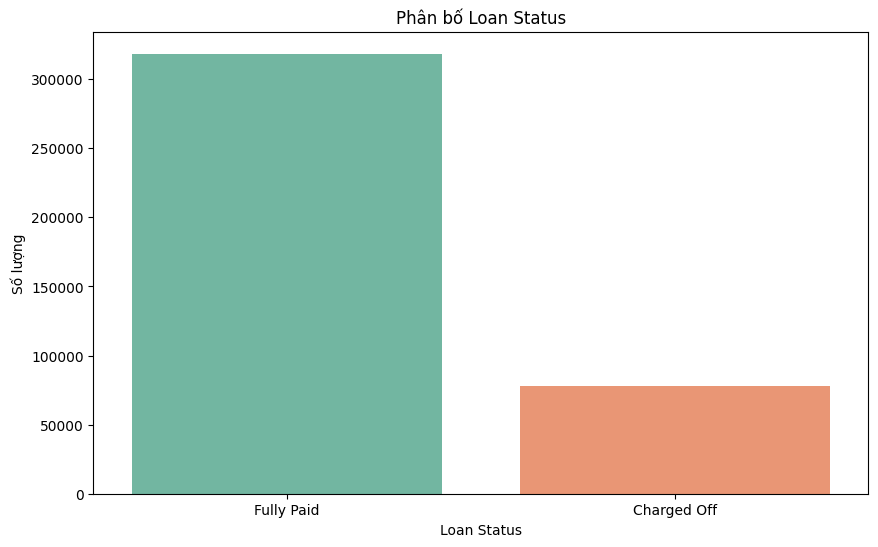

In [16]:
print(data['loan_status'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=data, hue='loan_status', palette='Set2', legend=False)


plt.title('Phân bố Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Số lượng')

plt.xticks()
plt.show()

In [17]:
# data['loan_status'] = data['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})
# print(data['loan_status'].value_counts())

## Numerical

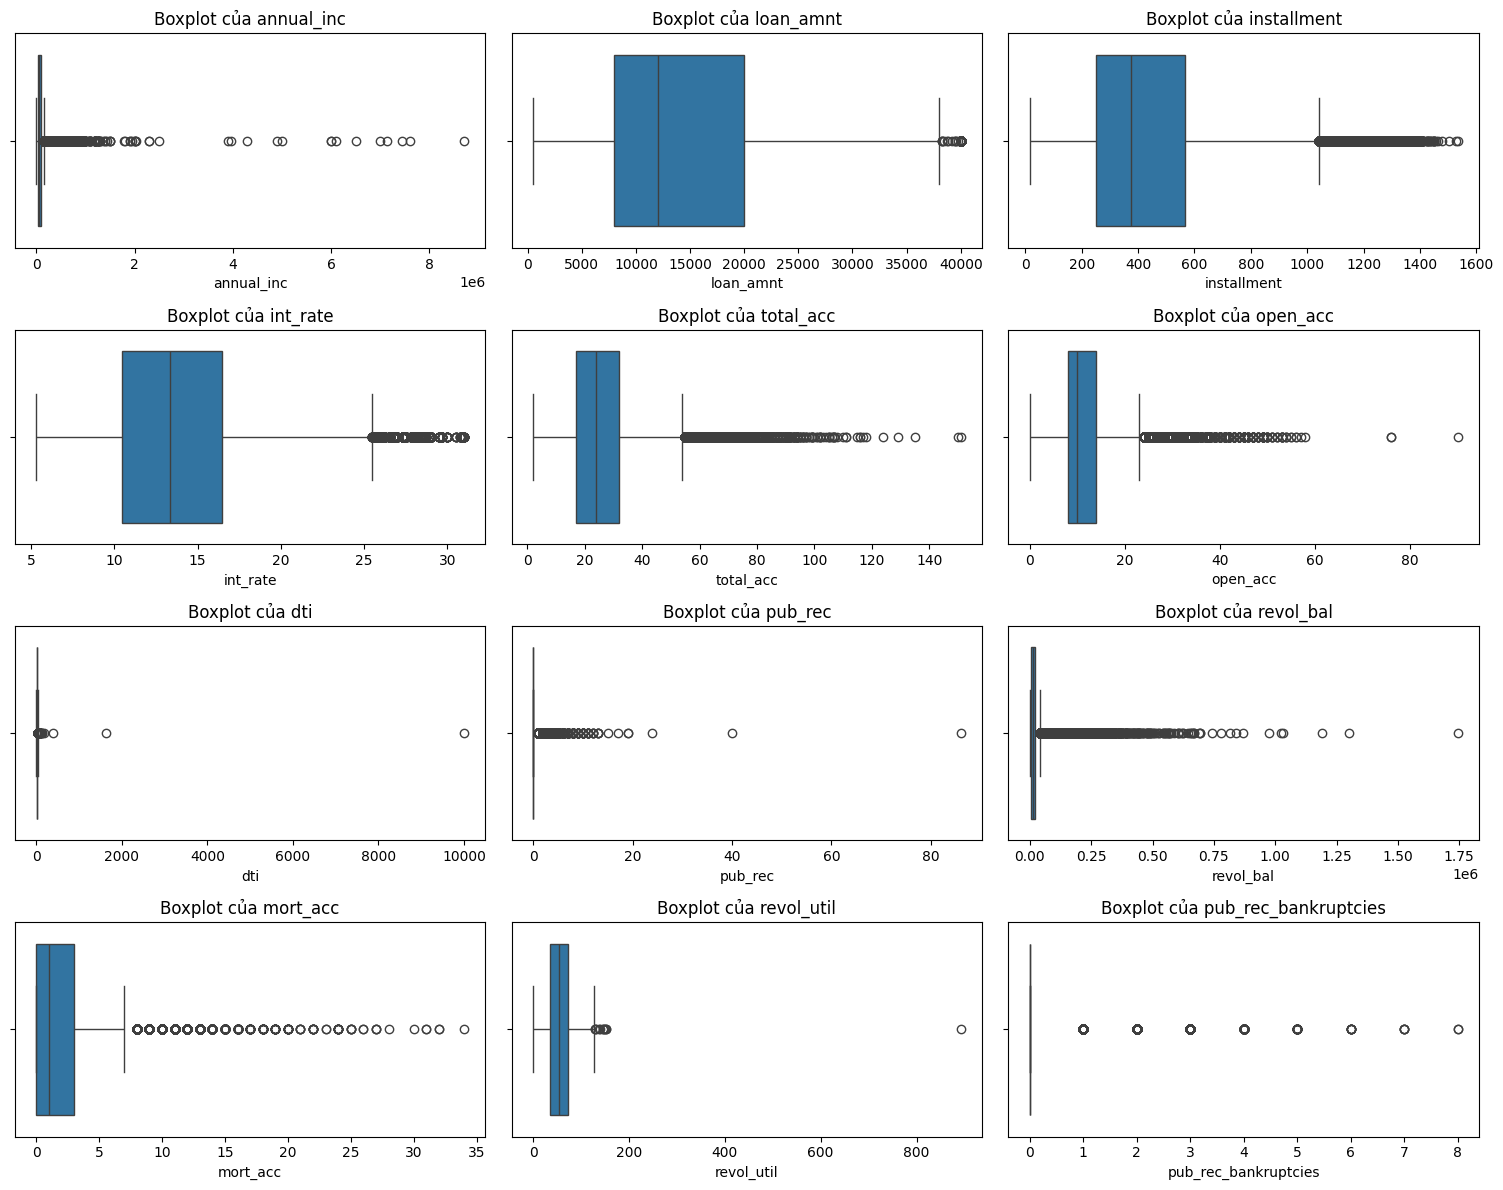

In [18]:
numerical_cols = [
    "annual_inc", "loan_amnt", "installment", "int_rate", "total_acc", "open_acc", "dti", "pub_rec", "revol_bal",
    "mort_acc", "revol_util", "pub_rec_bankruptcies"
]

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot của {col}")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### annual_inc

Thu nhập hàng năm do người vay tự báo cáo khi đăng ký.

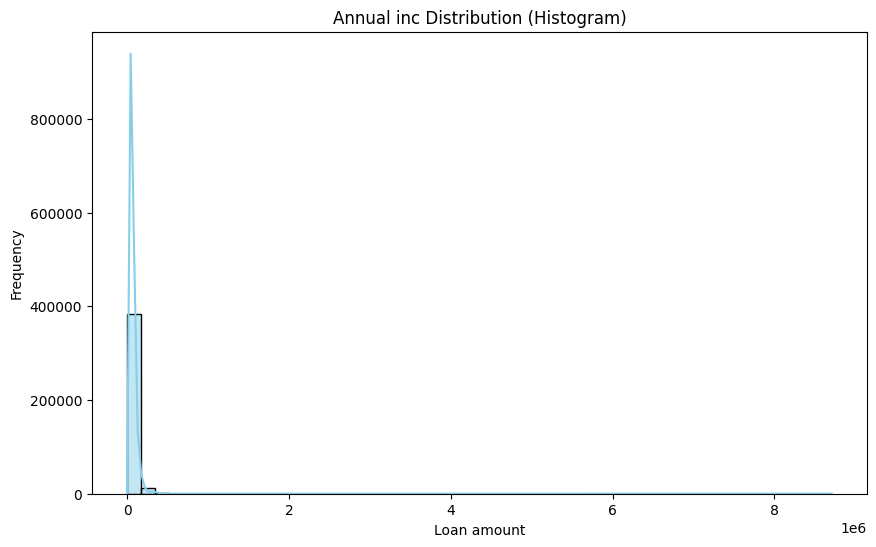

In [19]:
# Biểu đồ phân phối thu nhập hằng năm
plt.figure(figsize=(10, 6))
sns.histplot(data['annual_inc'], bins=50, kde=True, color='skyblue')

plt.title('Annual inc Distribution (Histogram)')
plt.xlabel('Loan amount')
plt.ylabel('Frequency')

plt.show()

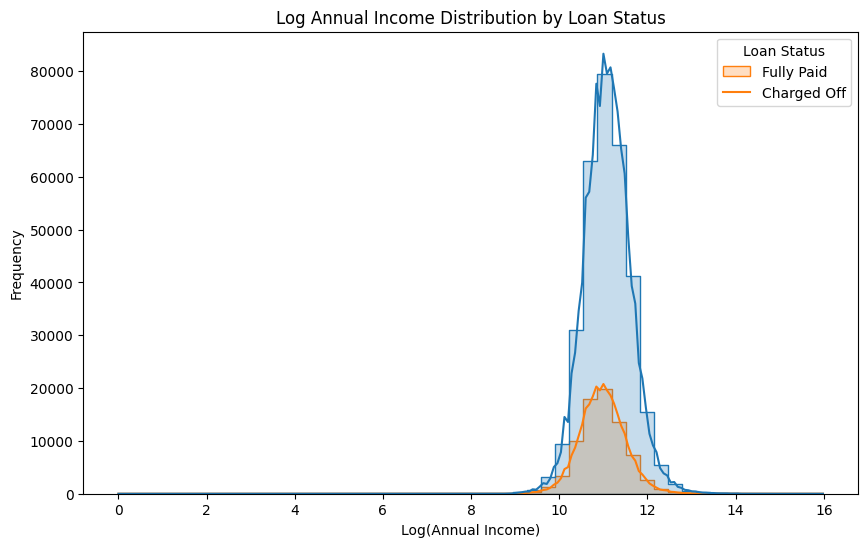

In [20]:
# Áp dụng log(annual_inc + 1) để tránh log(0)
data['log_annual_inc'] = np.log1p(data['annual_inc'])
data.drop('annual_inc', axis=1, inplace=True)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='log_annual_inc', hue='loan_status', bins=50, kde=True, element='step', common_norm=False)

plt.title('Log Annual Income Distribution by Loan Status')
plt.xlabel('Log(Annual Income)')
plt.ylabel('Frequency')

# Đặt legend chỉ một lần
plt.legend(title='Loan Status', labels=data['loan_status'].unique())

plt.show()


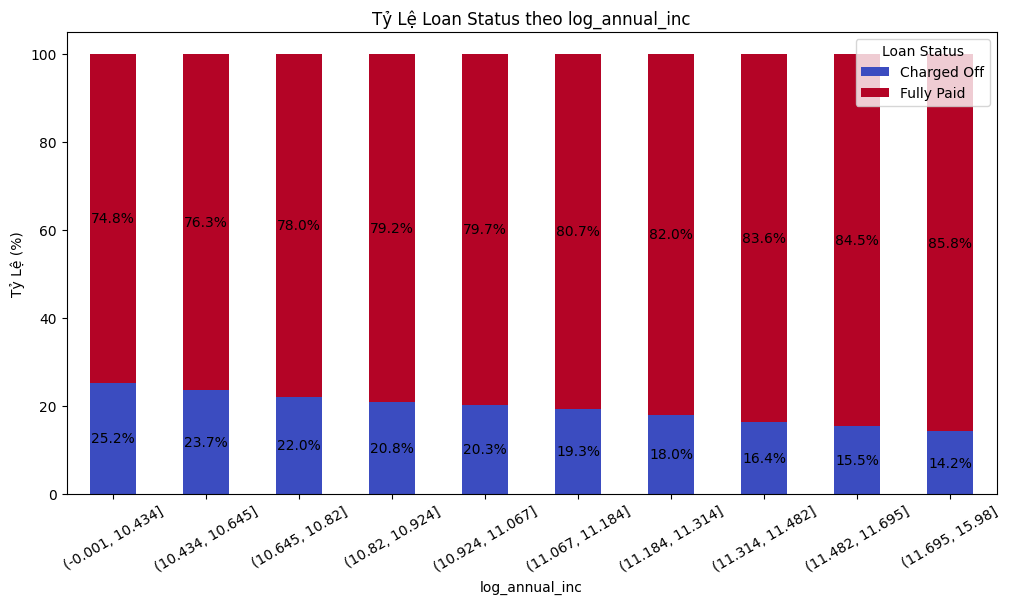

In [21]:
plot_loan_status_distribution(data, "log_annual_inc")

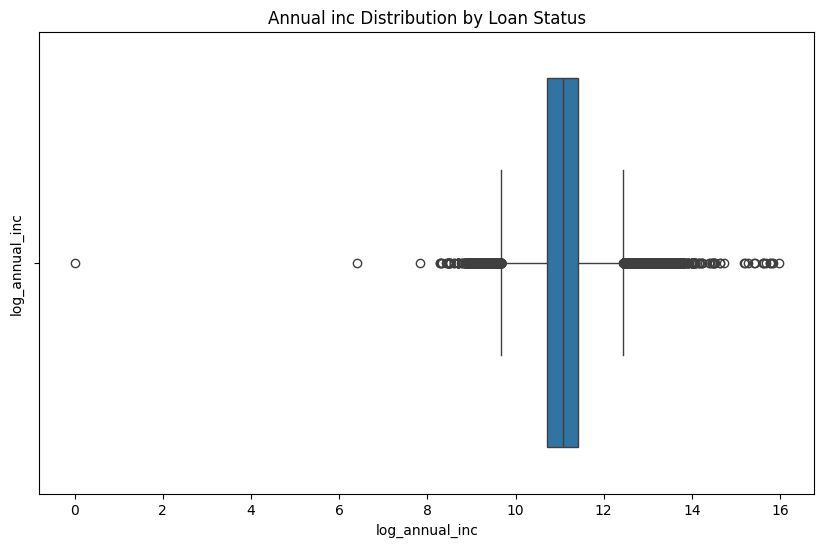

In [22]:
# Vẽ boxplot của log_annual_inc theo loan_status
plot_boxplot(data, "log_annual_inc", title="Annual inc Distribution by Loan Status")


In [23]:
Q1, Q3, IQR, lower, upper = calculate_iqr(data, "log_annual_inc")
print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower}, Upper Bound: {upper}\n")

outliers_log_annual_inc = data[(data['log_annual_inc'] < lower) | (data['log_annual_inc'] > upper)]
data = data[(data['log_annual_inc'] >= lower) & (data['log_annual_inc'] <= upper)]

  Q1: 10.714439990727769, Q3: 11.407576060361786, IQR: 0.6931360696340167, Lower Bound: 9.674735886276743, Upper Bound: 12.44728016481281



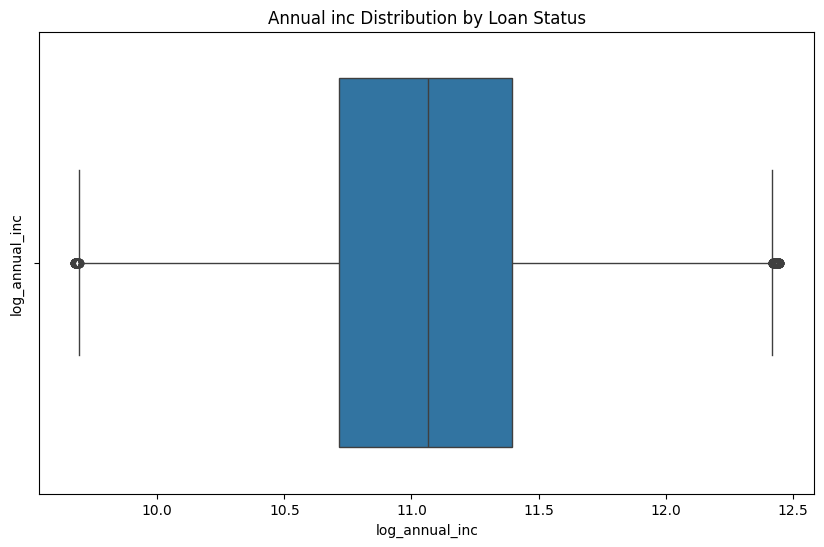

In [24]:
# Vẽ boxplot của log_annual_inc theo loan_status
plot_boxplot(data, "log_annual_inc", title="Annual inc Distribution by Loan Status")


In [25]:
data.drop('log_annual_inc', axis=1, inplace=True)

In [26]:
data.shape

(390584, 26)

### loan_amnt & installment

**loan_amnt**: Số tiền vay mà người vay đã đăng ký. Nếu bộ phận tín dụng giảm số tiền vay tại một thời điểm nào đó, thì giá trị này sẽ phản ánh sự thay đổi đó.

**installment**: Khoản thanh toán hàng tháng mà người vay phải trả nếu khoản vay được cấp.

In [27]:
#Cột loan_amnt và installment có mối tương quan cao (0.95). Cột installment quan trọng hơn vì nó thể hiện áp lực tài chính hàng tháng mà người vay phải đối mặt -> bỏ cột loan_amnt.
# data.drop('installment', axis=1, inplace=True)

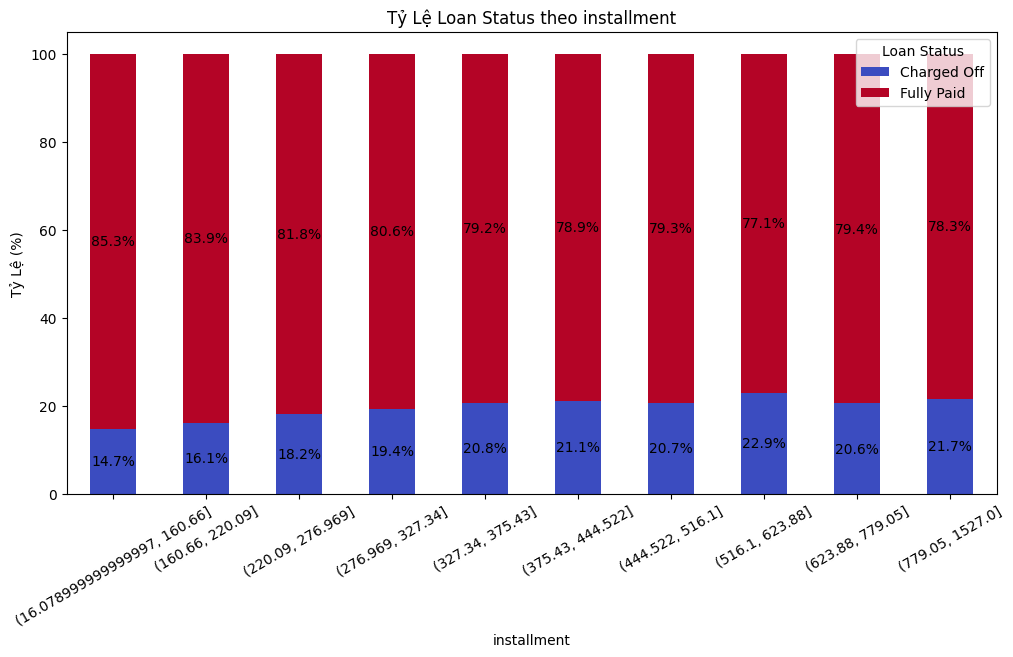

In [28]:
plot_loan_status_distribution(data, "installment")

In [29]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,76640.0,15150.208116,8432.193393,1000.0,8825.0,14000.0,20000.0,40000.0
Fully Paid,313944.0,13819.893755,8214.799020,500.0,7500.0,12000.0,19200.0,40000.0


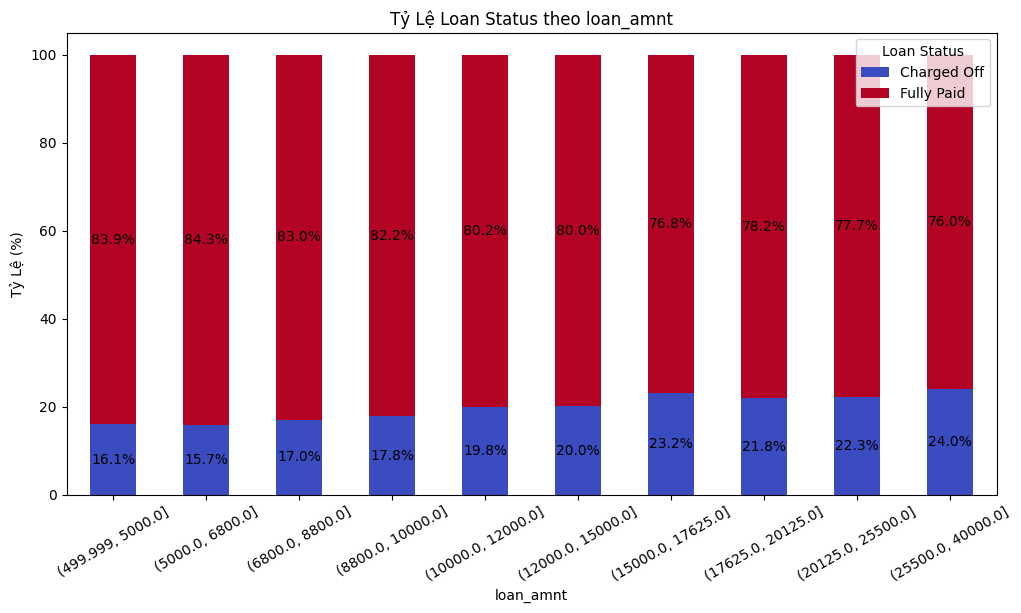

In [30]:
plot_loan_status_distribution(data, "loan_amnt")

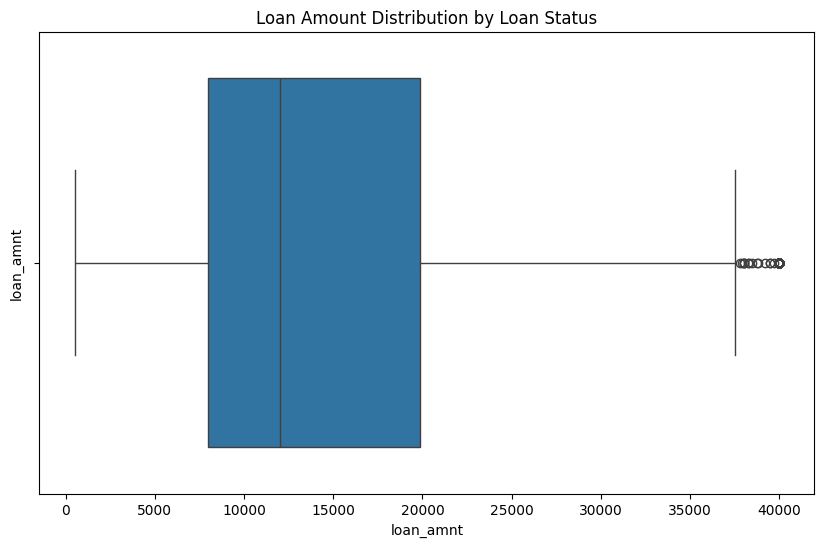

In [31]:
# Vẽ boxplot của loan_amnt theo loan_status
plot_boxplot(data, "loan_amnt", title="Loan Amount Distribution by Loan Status")


In [32]:
Q1, Q3, IQR, lower, upper = calculate_iqr(data, "loan_amnt")
print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower}, Upper Bound: {upper}\n")

outliers_loan_amnt = data[(data['loan_amnt'] < lower) | (data['loan_amnt'] > upper)]
data = data[(data['loan_amnt'] >= lower) & (data['loan_amnt'] <= upper)]

  Q1: 8000.0, Q3: 19850.0, IQR: 11850.0, Lower Bound: -9775.0, Upper Bound: 37625.0



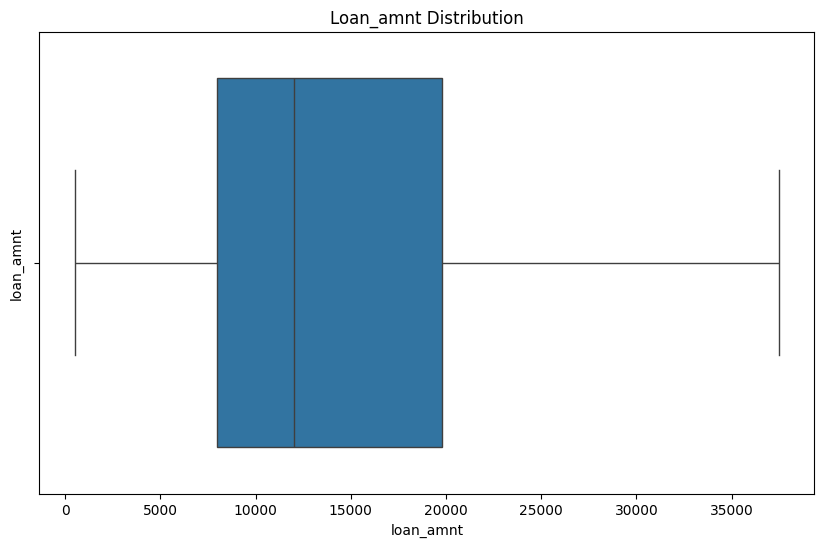

In [33]:
plot_boxplot(data, "loan_amnt", title="Loan_amnt Distribution")

In [34]:
#Cột loan_amnt và installment có mối tương quan cao (0.95). Cột installment quan trọng hơn vì nó thể hiện áp lực tài chính hàng tháng mà người vay phải đối mặt -> bỏ cột loan_amnt.
data.drop('installment', axis=1, inplace=True)

In [35]:
data.shape

(390408, 25)

### int_rate

Lãi suất của khoản vay.

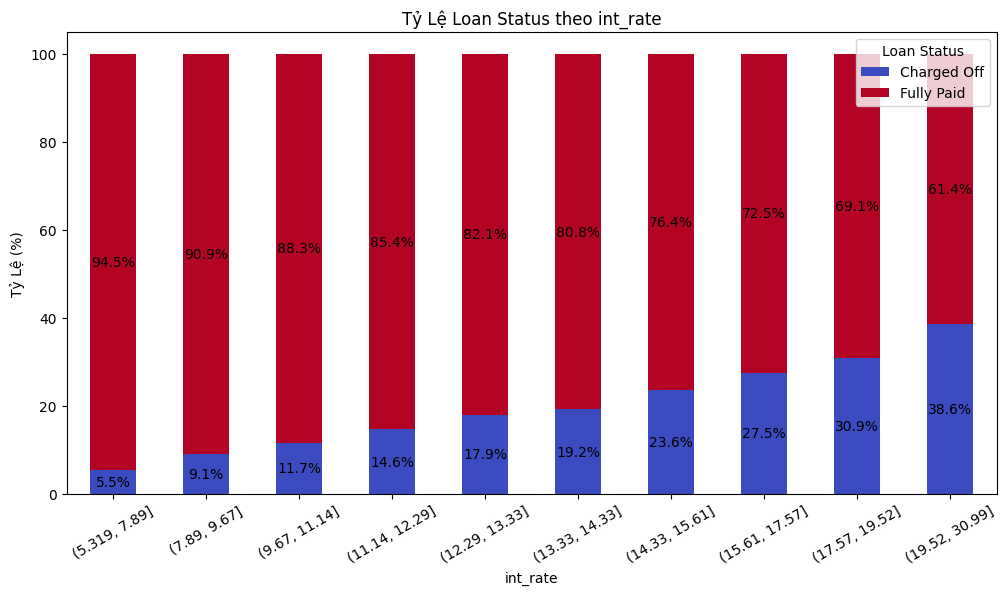

In [36]:
plot_loan_status_distribution(data, "int_rate")

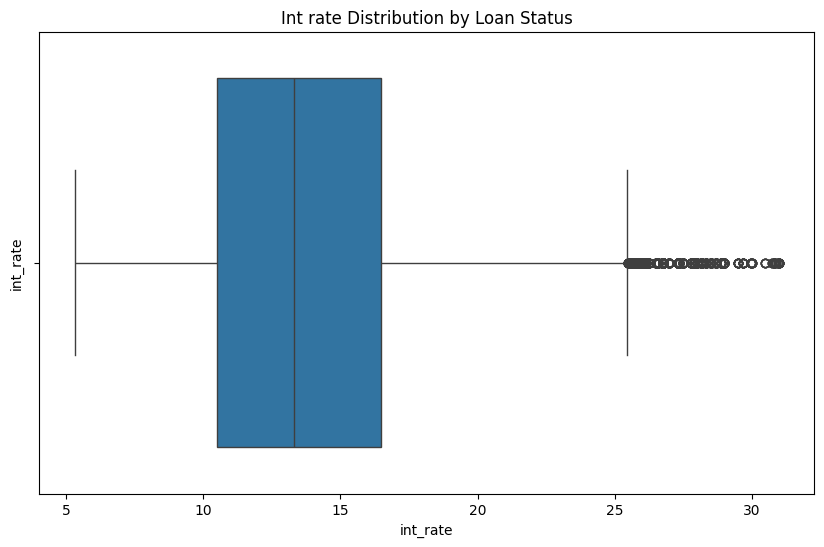

In [37]:
# Vẽ boxplot của int_rate theo loan_status
plot_boxplot(data, "int_rate", title="Int rate Distribution by Loan Status")


In [38]:
Q1, Q3, IQR, lower, upper = calculate_iqr(data, "int_rate")
print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower}, Upper Bound: {upper}\n")

outliers_int_rate = data[(data['int_rate'] < lower) | (data['int_rate'] > upper)]
data = data[(data['int_rate'] >= lower) & (data['int_rate'] <= upper)]

  Q1: 10.49, Q3: 16.49, IQR: 5.999999999999998, Lower Bound: 1.4900000000000038, Upper Bound: 25.489999999999995



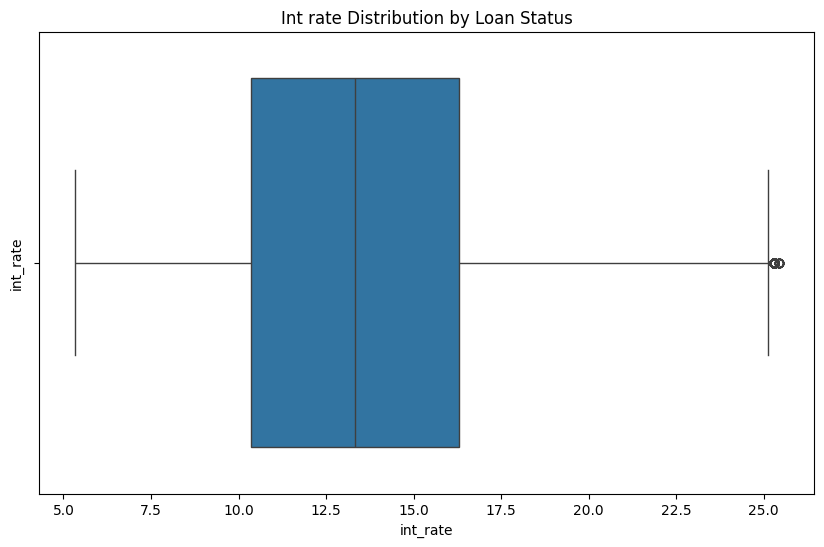

In [39]:
# Vẽ boxplot của int_rate theo loan_status
plot_boxplot(data, "int_rate", title="Int rate Distribution by Loan Status")


In [40]:
data.shape

(386700, 25)

### total_acc & open_acc

**total_acc**: Tổng số lượng dòng tín dụng hiện tại trong hồ sơ tín dụng của người vay.




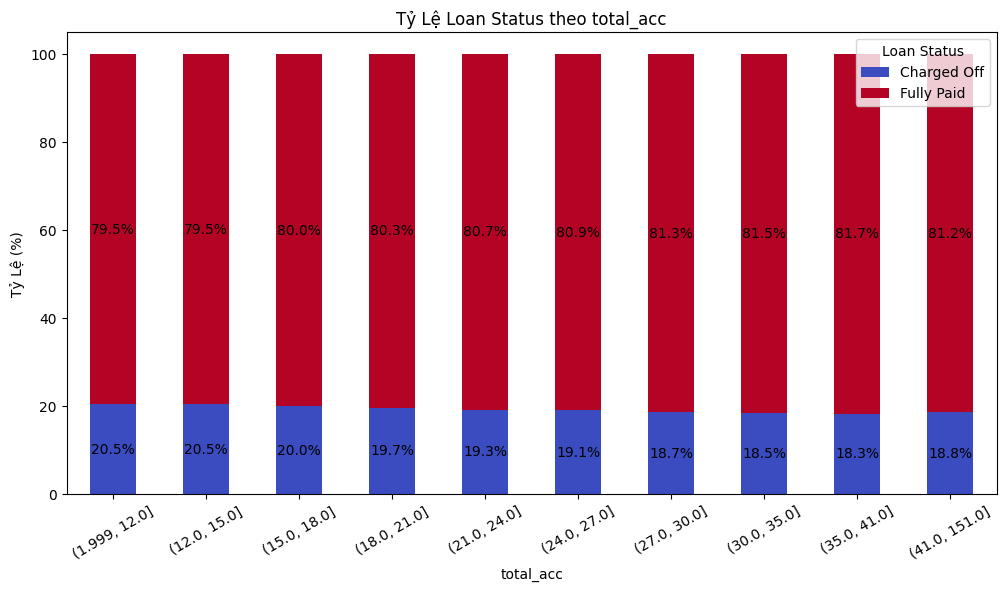

In [41]:
plot_loan_status_distribution(data, "total_acc")

In [42]:
data.drop('total_acc', axis=1, inplace=True)

**open_acc**: Số lượng dòng tín dụng đang mở trong hồ sơ tín dụng của người vay.

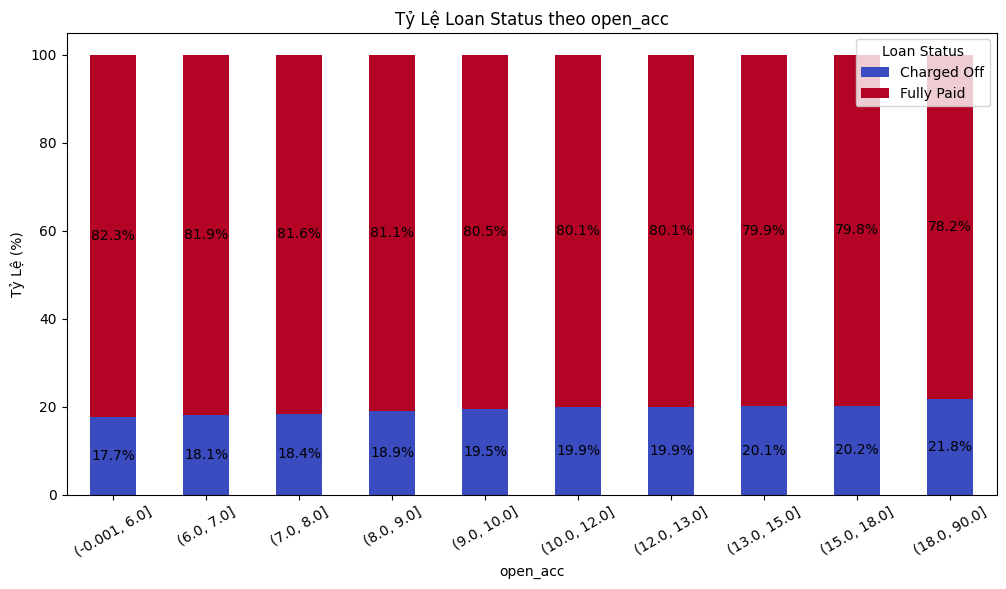

In [43]:
plot_loan_status_distribution(data, "open_acc")

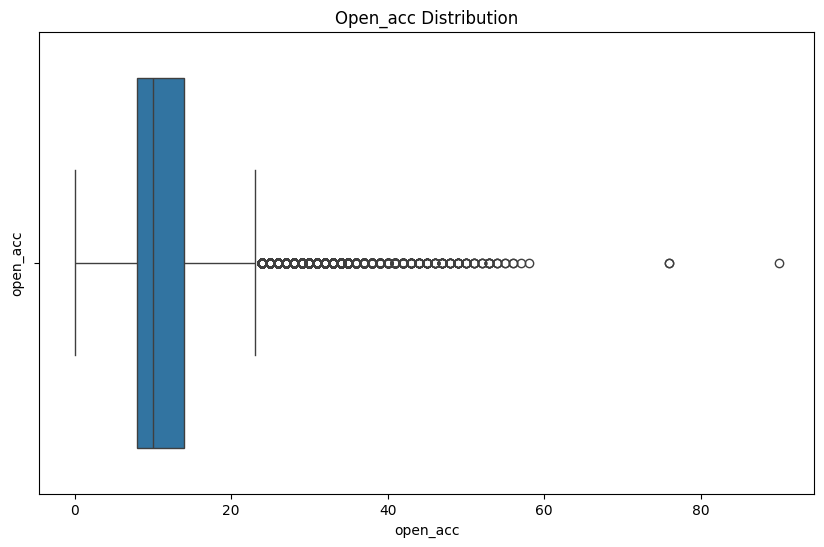

In [44]:
plot_boxplot(data, "open_acc", title="Open_acc Distribution")

In [45]:
# Xác định IQR
Q1, Q3, IQR, lower, upper = calculate_iqr(data, "open_acc")
print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower}, Upper Bound: {upper}\n")

outliers = data[(data['open_acc'] < lower) | (data['open_acc'] > upper)]
data = data[(data['open_acc'] >= lower) & (data['open_acc'] <= upper)]


  Q1: 8.0, Q3: 14.0, IQR: 6.0, Lower Bound: -1.0, Upper Bound: 23.0



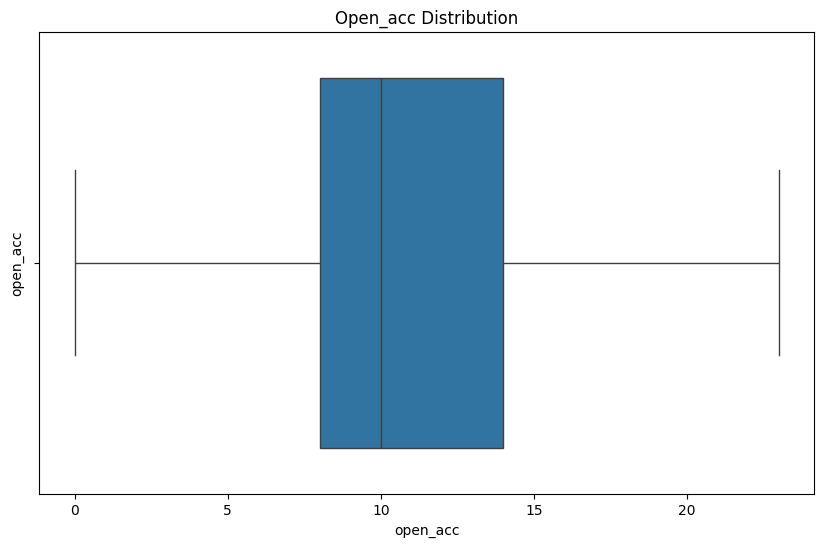

In [46]:
plot_boxplot(data, "open_acc", title="Open_acc Distribution")

In [47]:
data.shape

(376766, 24)

### dti, pub_rec, revol_bal

**dti**: Tỷ lệ nợ trên thu nhập (DTI - Debt-to-Income Ratio), được tính bằng tổng số tiền thanh toán nợ hàng tháng của người vay (không bao gồm khoản thế chấp và khoản vay từ LendingClub) chia cho thu nhập hàng tháng do người vay tự báo cáo.

In [48]:
data.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,72635.0,19.414184,8.349015,0.0,13.25,19.20,25.38,88.21
Fully Paid,304131.0,16.749652,7.910100,0.0,10.86,16.27,22.17,138.03


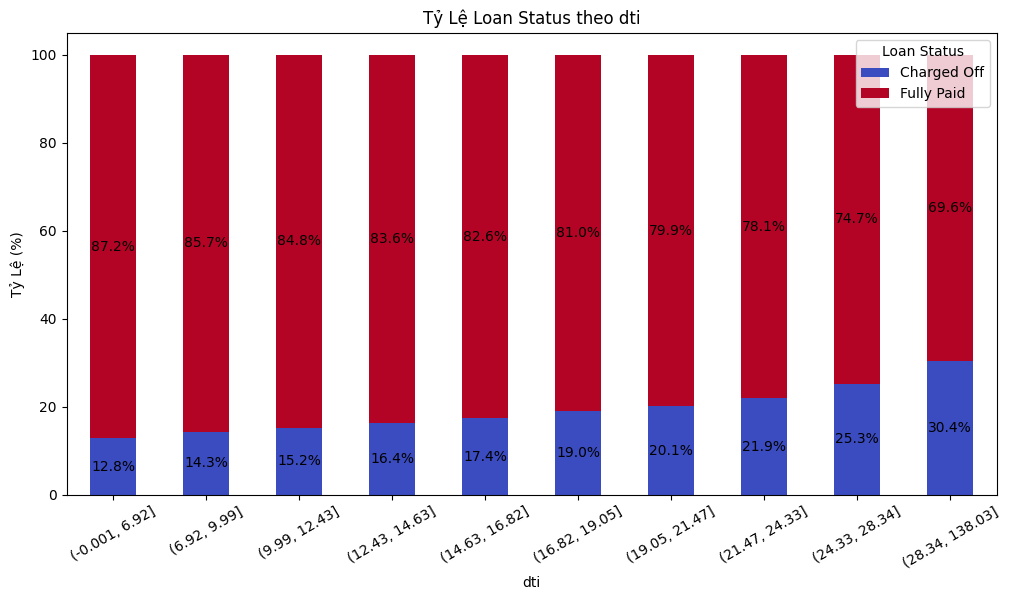

In [49]:
plot_loan_status_distribution(data, "dti")

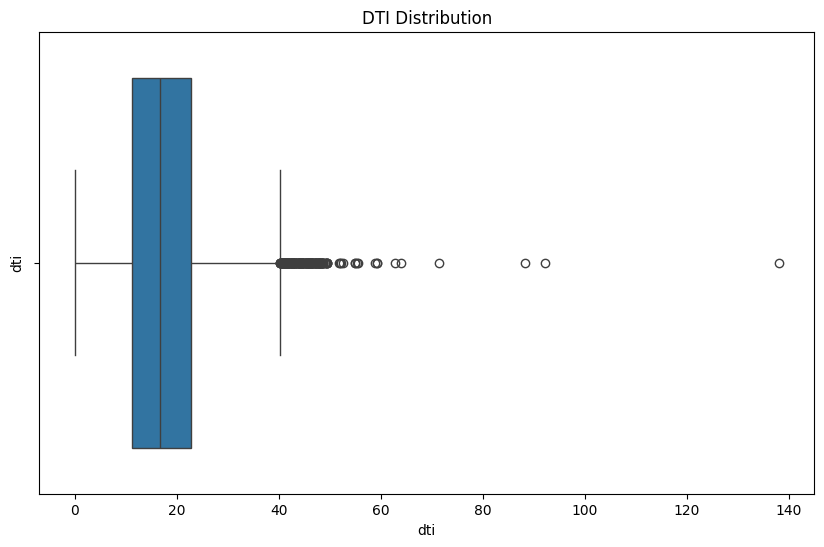

In [50]:
plot_boxplot(data, "dti", title="DTI Distribution")

In [51]:
Q1, Q3, IQR, lower, upper = calculate_iqr(data, "dti")
print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower}, Upper Bound: {upper}\n")

outliers = data[(data['dti'] < lower) | (data['dti'] > upper)]
data = data[(data['dti'] >= lower) & (data['dti'] <= upper)]

  Q1: 11.25, Q3: 22.84, IQR: 11.59, Lower Bound: -6.134999999999998, Upper Bound: 40.224999999999994



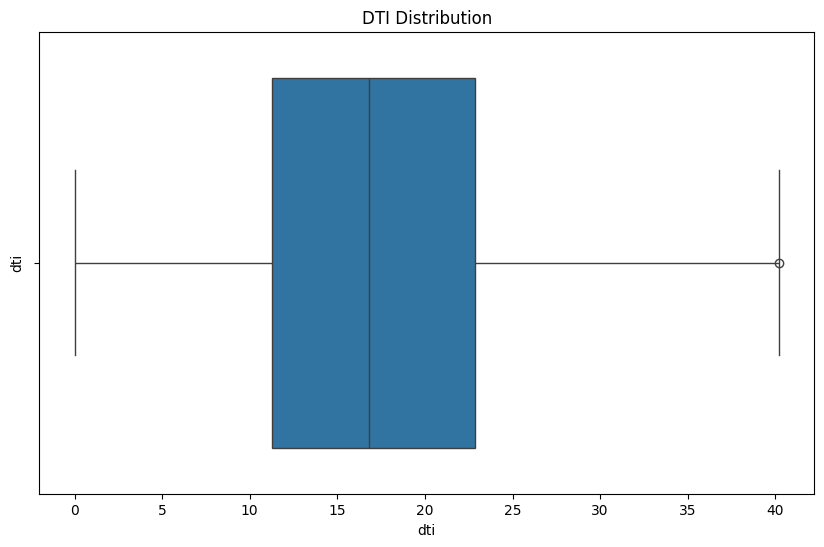

In [52]:
plot_boxplot(data, "dti", title="DTI Distribution")

In [53]:
data.shape

(376553, 24)

**pub_rec**: Số lượng bản ghi công khai tiêu cực.

In [54]:
print(data['pub_rec'].value_counts())

pub_rec
0.0     321457
1.0      47546
2.0       5158
3.0       1445
4.0        487
5.0        220
6.0        114
7.0         52
8.0         31
10.0        11
9.0         10
11.0         7
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64


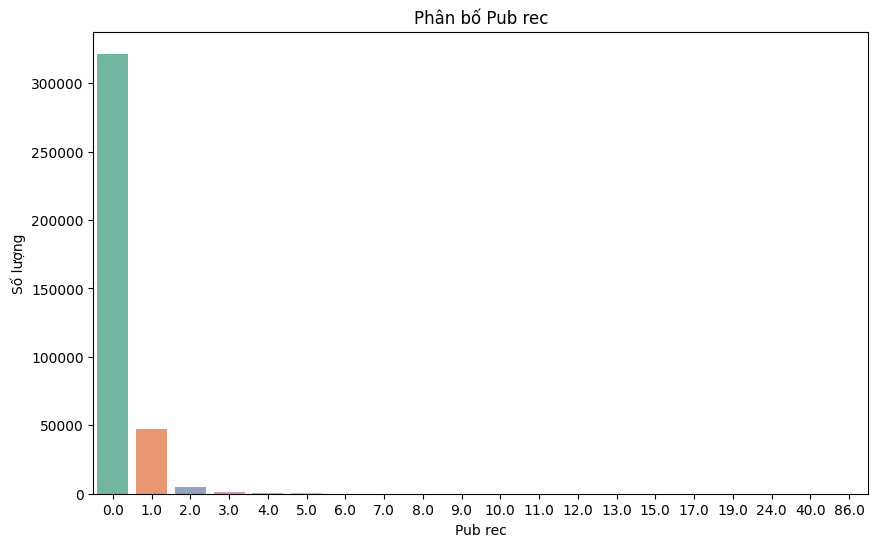

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pub_rec', data=data, hue='pub_rec', palette='Set2', legend=False)


plt.title('Phân bố Pub rec')
plt.xlabel('Pub rec')
plt.ylabel('Số lượng')

plt.xticks()
plt.show()

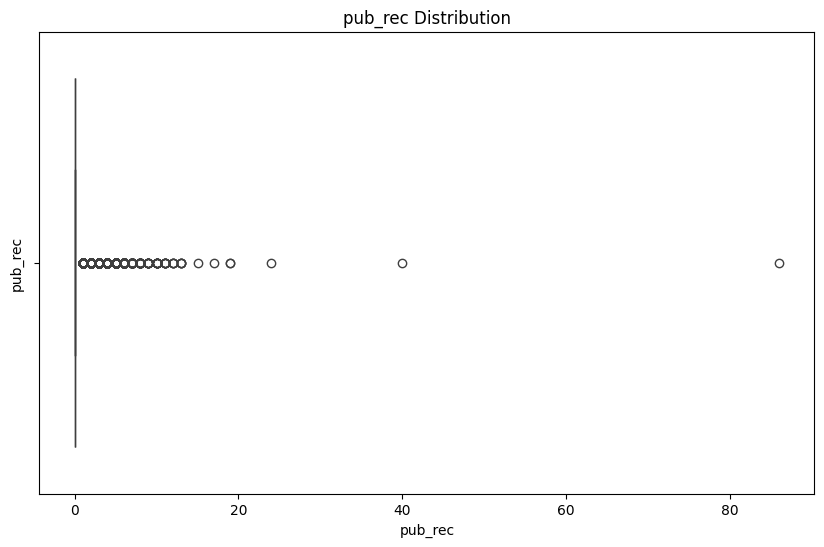

In [56]:
plot_boxplot(data, "pub_rec", title="pub_rec Distribution")

In [57]:
data.shape

(376553, 24)

Do nhóm có công khai tài chính xấu từ 2 trở lên quá ít, ta gộp lại thành một nhóm. Cột `pub_rec` sẽ chỉ có hai giá trị: 0 (không có) và 1 (có).

In [58]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

data['pub_rec'] = data.pub_rec.apply(pub_rec)

In [59]:
data.shape

(376553, 24)

**revol_bal**: Tổng số dư tín dụng quay vòng của người vay.

In [60]:
# # Đo lường tổng nợ tín dụng quay vòng, nhưng revol_util (tỷ lệ sử dụng tín dụng)
# đã cung cấp thông tin tương tự ở dạng chuẩn hóa, phù hợp hơn để so sánh giữa các cá nhân. -> bỏ revol_bal

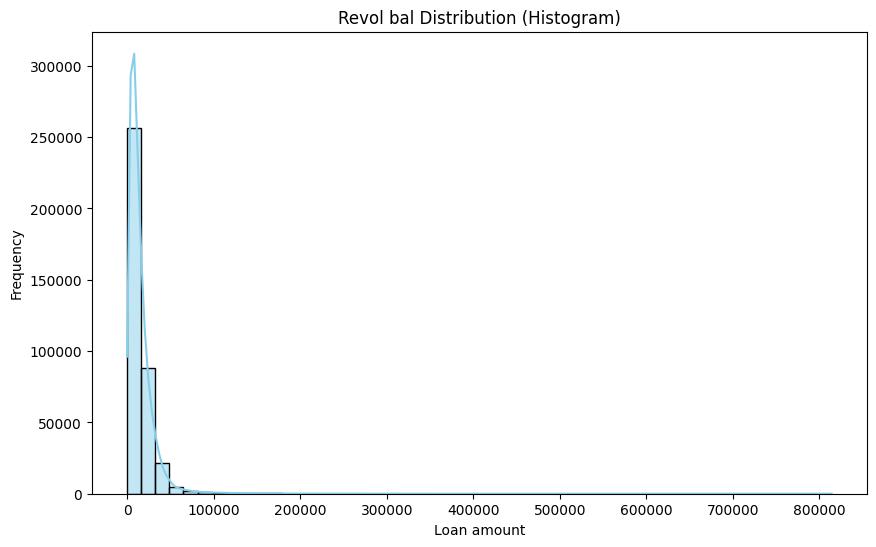

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data['revol_bal'], bins=50, kde=True, color='skyblue')

plt.title('Revol bal Distribution (Histogram)')
plt.xlabel('Loan amount')
plt.ylabel('Frequency')

plt.show()

In [62]:
data['revol_bal'] = np.log1p(data['revol_bal'])  # log(1 + x) để tránh log(0)

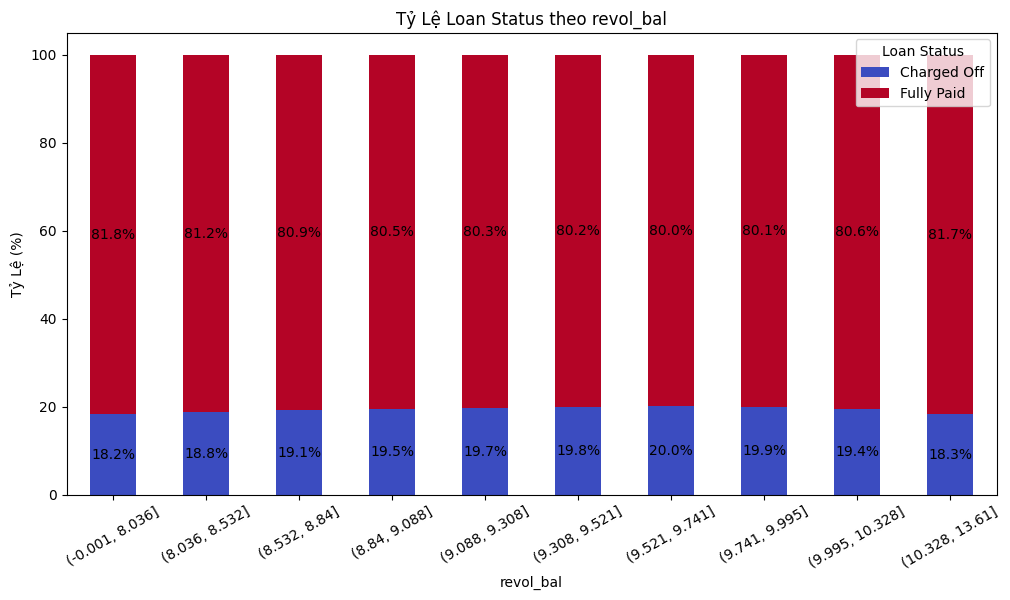

In [63]:
plot_loan_status_distribution(data, "revol_bal")

In [64]:
data.drop('revol_bal', axis=1, inplace=True)

In [65]:
data.shape

(376553, 23)

### mort_acc, revol_util, pub_rec_bankruptcies

<b>mort_acc</b>: Số lượng tài khoản thế chấp của người vay.

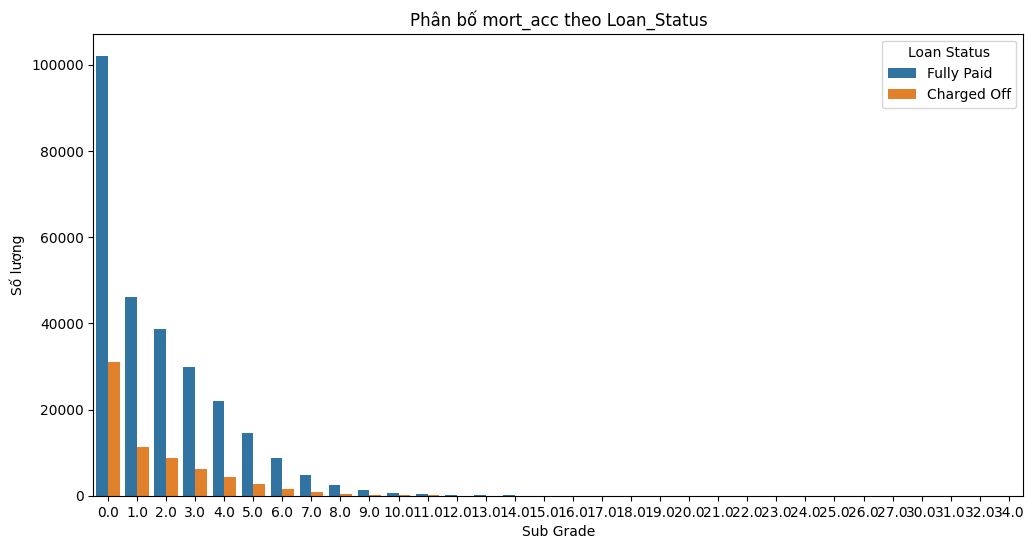

In [66]:
mort_acc_order = sorted(data["mort_acc"].dropna().unique())

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="mort_acc", hue="loan_status", order=mort_acc_order)
plt.title("Phân bố mort_acc theo Loan_Status")
plt.xlabel("Sub Grade")
plt.ylabel("Số lượng")
plt.xticks(rotation=0)
plt.legend(title="Loan Status")
plt.show()


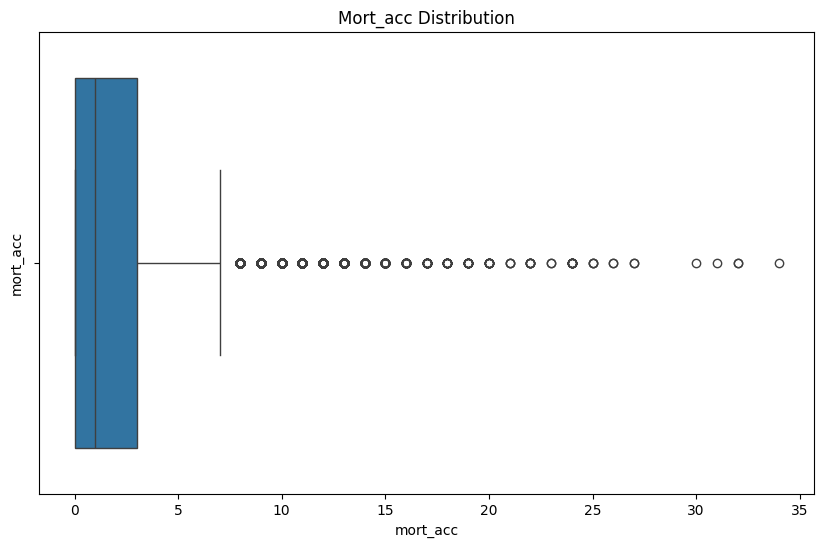

In [67]:
plot_boxplot(data, "mort_acc", title="Mort_acc Distribution")

In [68]:
Q1, Q3, IQR, lower_bound_mort_acc, upper_bound_mort_acc = calculate_iqr(data, "mort_acc")

outliers_mort_acc = data[(data['mort_acc'] < lower_bound_mort_acc) | (data['mort_acc'] > upper_bound_mort_acc)]
data = data[(data['mort_acc'] >= lower_bound_mort_acc) & (data['mort_acc'] <= upper_bound_mort_acc)]

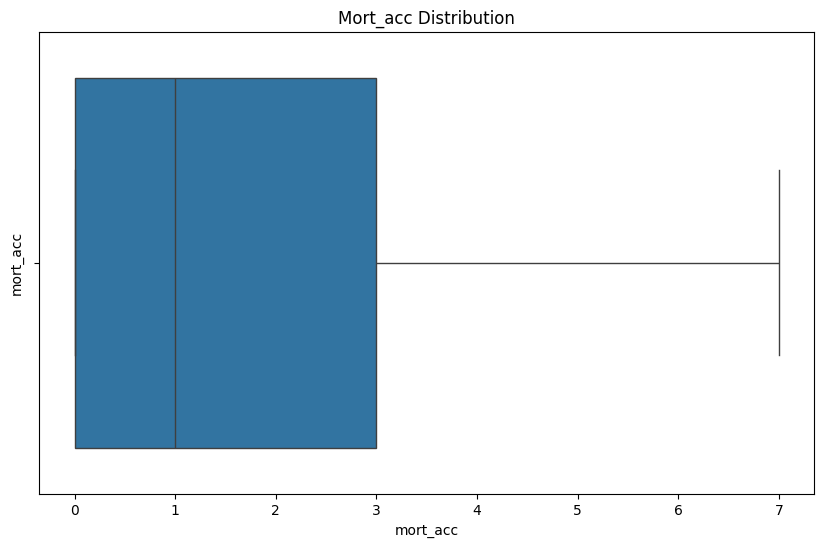

In [69]:
plot_boxplot(data, "mort_acc", title="Mort_acc Distribution")

In [70]:
data.shape

(333468, 23)

**revol_util**: Tỷ lệ sử dụng tín dụng quay vòng, tức là tỷ lệ tín dụng mà người vay đang sử dụng so với tổng tín dụng quay vòng có sẵn.

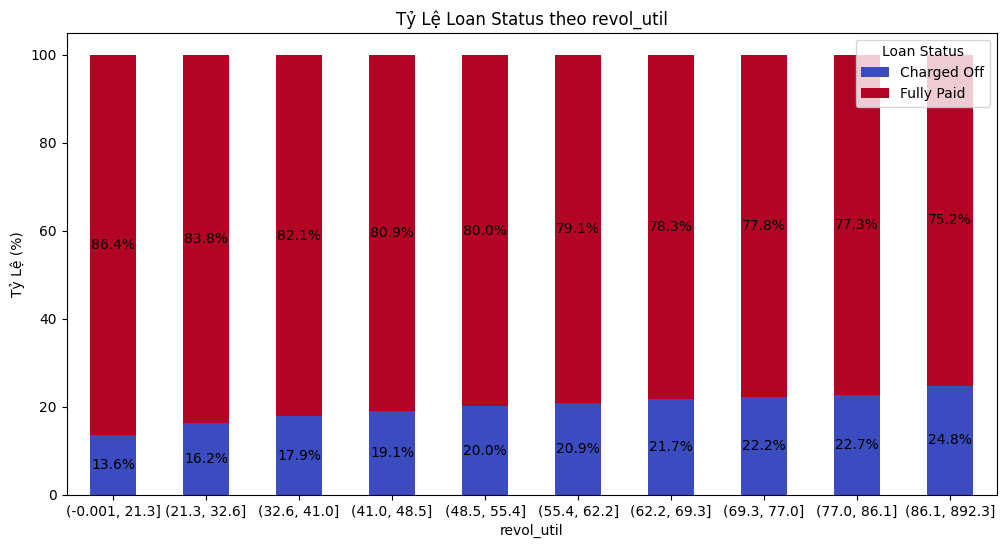

In [71]:
plot_loan_status_distribution(data, "revol_util", rotation=0)

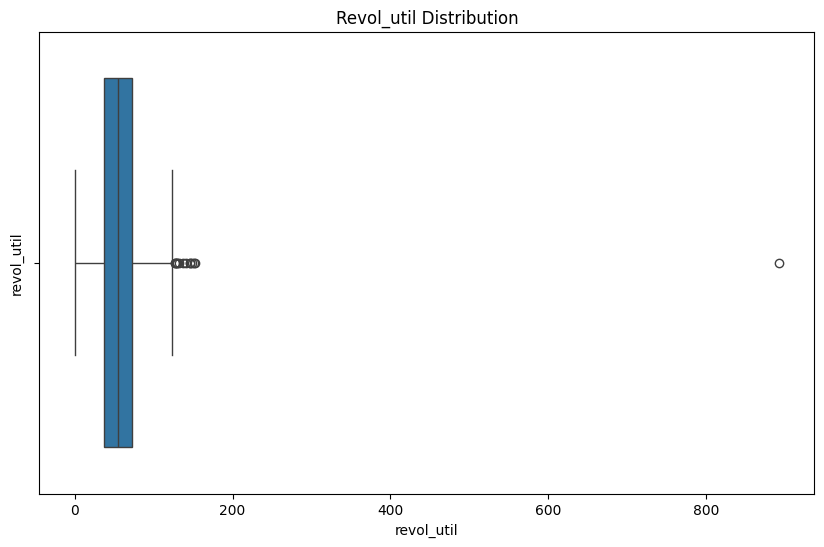

In [72]:
plot_boxplot(data, "revol_util", title="Revol_util Distribution")

In [73]:
Q1, Q3, IQR, lower_bound_revol_util, upper_bound_revol_util = calculate_iqr(data, "revol_util")

outliers_revol_util = data[(data['revol_util'] < lower_bound_revol_util) | (data['revol_util'] > upper_bound_revol_util)]
data = data[(data['revol_util'] >= lower_bound_revol_util) & (data['revol_util'] <= upper_bound_revol_util)]

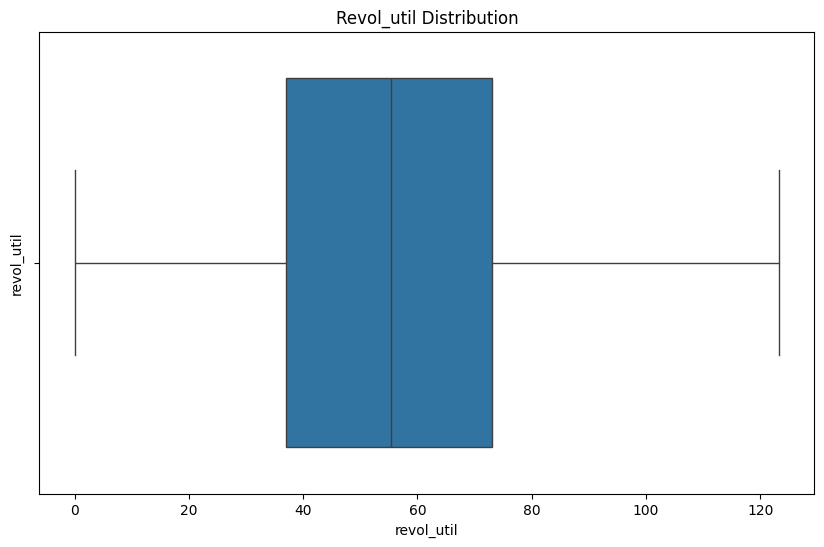

In [74]:
plot_boxplot(data, "revol_util", title="Revol_util Distribution")

**pub_rec_bankruptcies**: Số lần phá sản công khai của người vay. Là 1 phần của pub_rec -> bỏ

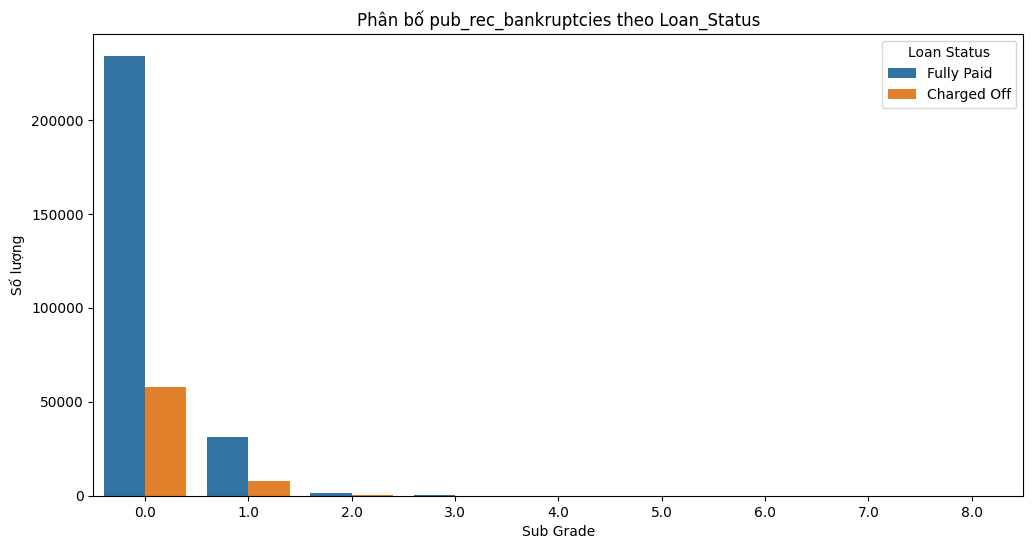

In [75]:
pub_rec_bankruptcies_order = sorted(data["pub_rec_bankruptcies"].dropna().unique())

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="pub_rec_bankruptcies", hue="loan_status", order=pub_rec_bankruptcies_order)
plt.title("Phân bố pub_rec_bankruptcies theo Loan_Status")
plt.xlabel("Sub Grade")
plt.ylabel("Số lượng")
plt.xticks(rotation=0)
plt.legend(title="Loan Status")
plt.show()


In [76]:
data.drop('pub_rec_bankruptcies', axis=1, inplace=True)

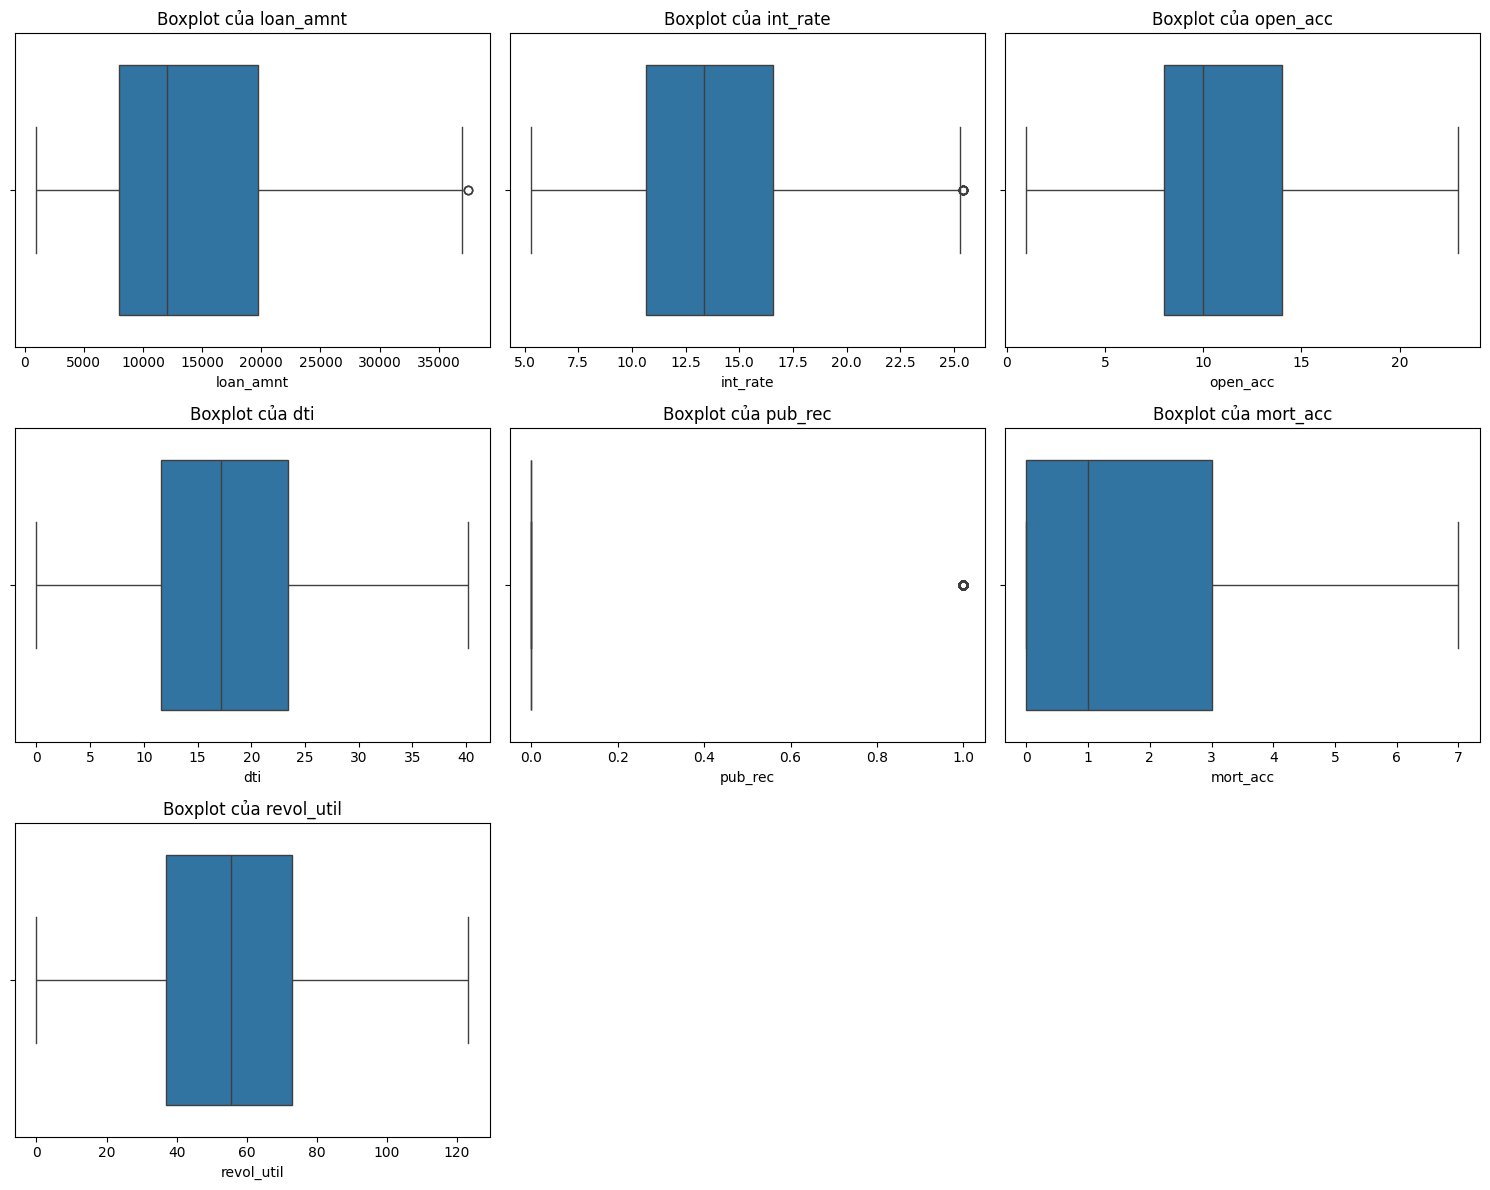

In [77]:
numerical_cols = [
    "loan_amnt", "int_rate", "open_acc", "dti", "pub_rec",
    "mort_acc", "revol_util"
]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot của {col}")
    axes[i].set_xlabel(col)

for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [78]:
data.shape

(333250, 22)

## Categorical

In [79]:
def plot_countplot(df, x_column, hue_column="loan_status", order=None, title=None, figsize=(10, 6), rotation=45):
    """
    Vẽ countplot cho một cột trong DataFrame.
    """
    plt.figure(figsize=figsize)
    sns.countplot(data=df, x=x_column, hue=hue_column, order=order)

    plt.xticks(rotation=rotation)
    plt.xlabel(x_column)
    plt.ylabel("Count")
    plt.title(title if title else f'Countplot of {x_column}')
    plt.legend(title=hue_column)

    plt.show()


In [80]:
data['loan_status'] = data['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})
print(data['loan_status'].value_counts())

loan_status
0    266931
1     66319
Name: count, dtype: int64


### term

In [81]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

### grade & sub_grade



Vì sub_grade là một đặc trưng chi tiết hơn của grade, nên chúng ta sẽ loại bỏ grade.

In [82]:
print(sorted(data['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


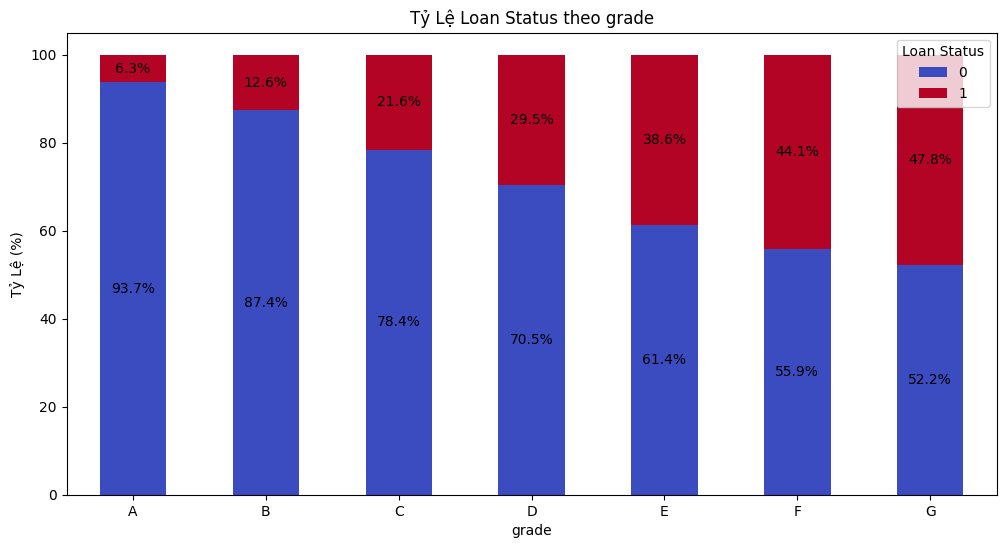

In [83]:
plot_loan_status_distribution(data, "grade", rotation=0)

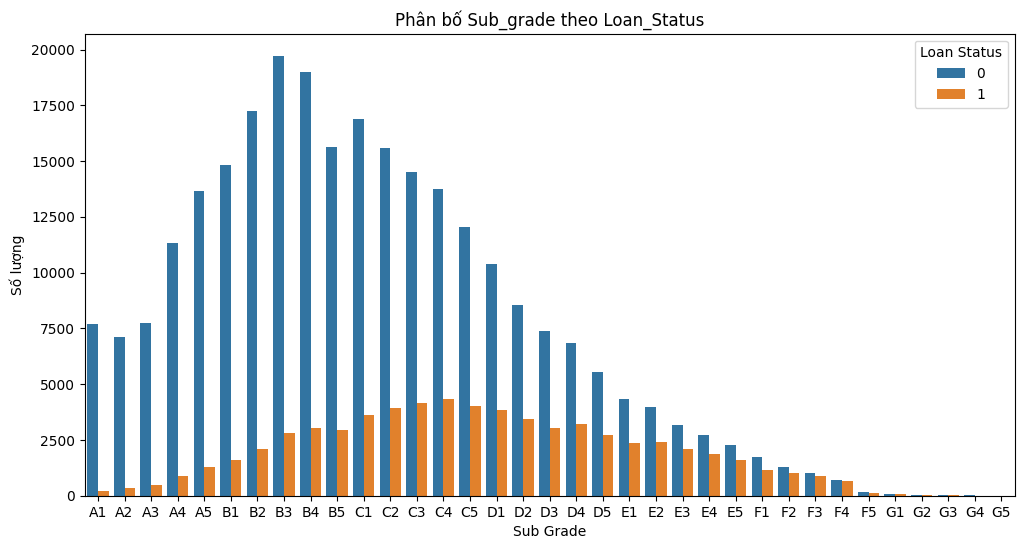

In [84]:
sub_grade_order = sorted(data["sub_grade"].dropna().unique())

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="sub_grade", hue="loan_status", order=sub_grade_order)
plt.title("Phân bố Sub_grade theo Loan_Status")
plt.xlabel("Sub Grade")
plt.ylabel("Số lượng")
plt.xticks(rotation=0)
plt.legend(title="Loan Status")
plt.show()


In [85]:
data.drop('grade', axis=1, inplace=True)

### issue_d & earliest_cr_line & address


**issue_d**: 	Tháng mà khoản vay được cấp vốn.

In [86]:
data.drop('issue_d', axis=1, inplace=True)

**earliest_cr_line**: Tháng mà người vay mở dòng tín dụng đầu tiên.

In [87]:
# data['earliest_cr_line'].head(10)

In [88]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y').dt.year
data['earliest_cr_line'] = data['earliest_cr_line'].astype(float)
data['earliest_cr_line'].head(10)

0    1990.0
1    2004.0
2    2007.0
3    2006.0
4    1999.0
5    2005.0
6    2005.0
7    1994.0
8    1994.0
9    1997.0
Name: earliest_cr_line, dtype: float64

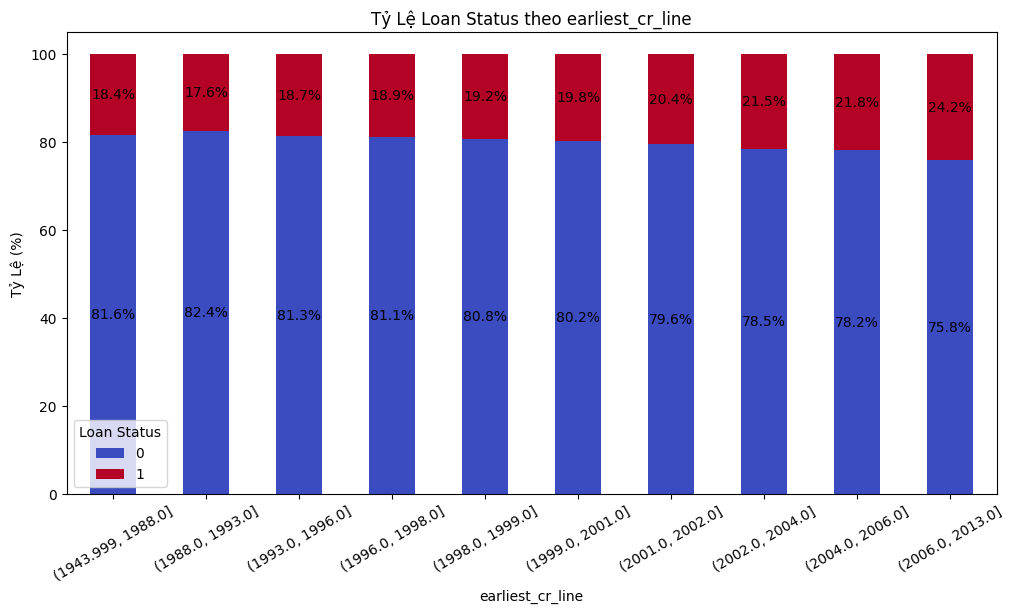

In [89]:
plot_loan_status_distribution(data, "earliest_cr_line", rotation=30)

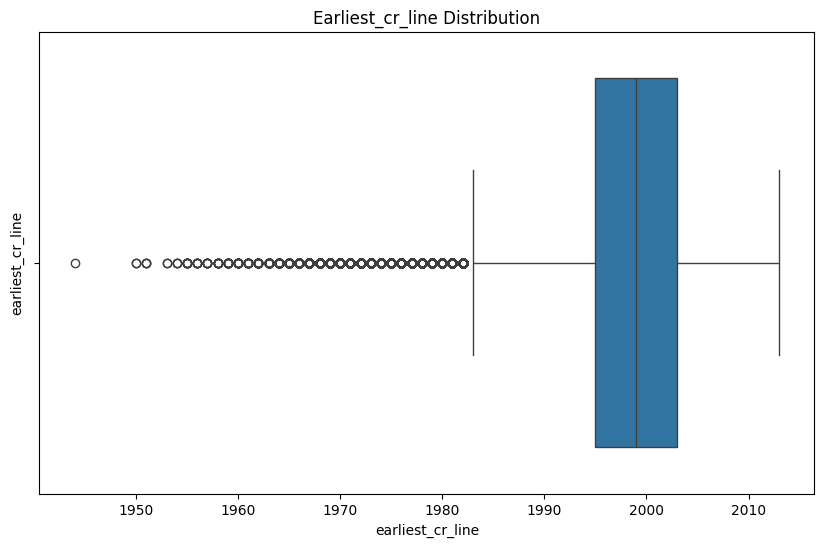

In [90]:
plot_boxplot(data, "earliest_cr_line", title="Earliest_cr_line Distribution")

In [91]:
Q1, Q3, IQR, lower, upper = calculate_iqr(data, "earliest_cr_line")
print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower}, Upper Bound: {upper}\n")

outliers = data[(data['earliest_cr_line'] < lower) | (data['earliest_cr_line'] > upper)]
data = data[(data['earliest_cr_line'] >= lower) & (data['earliest_cr_line'] <= upper)]

  Q1: 1995.0, Q3: 2003.0, IQR: 8.0, Lower Bound: 1983.0, Upper Bound: 2015.0



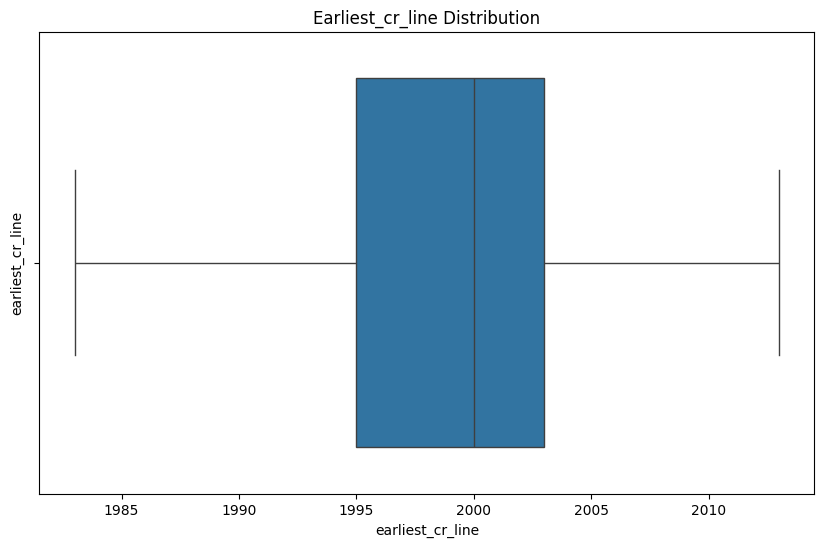

In [92]:
plot_boxplot(data, "earliest_cr_line", title="Earliest_cr_line Distribution")

In [93]:
data.shape

(321558, 20)

**address**: Địa chỉ của người vay, bao gồm Zip code

In [94]:
data = data.copy()
data['zip_code'] = data['address'].apply(lambda x: x[-5:])


In [95]:
data['zip_code'].value_counts()

zip_code
70466    46281
30723    45939
22690    45787
48052    45565
00813    36962
29597    36829
05113    36602
11650     9249
93700     9237
86630     9107
Name: count, dtype: int64

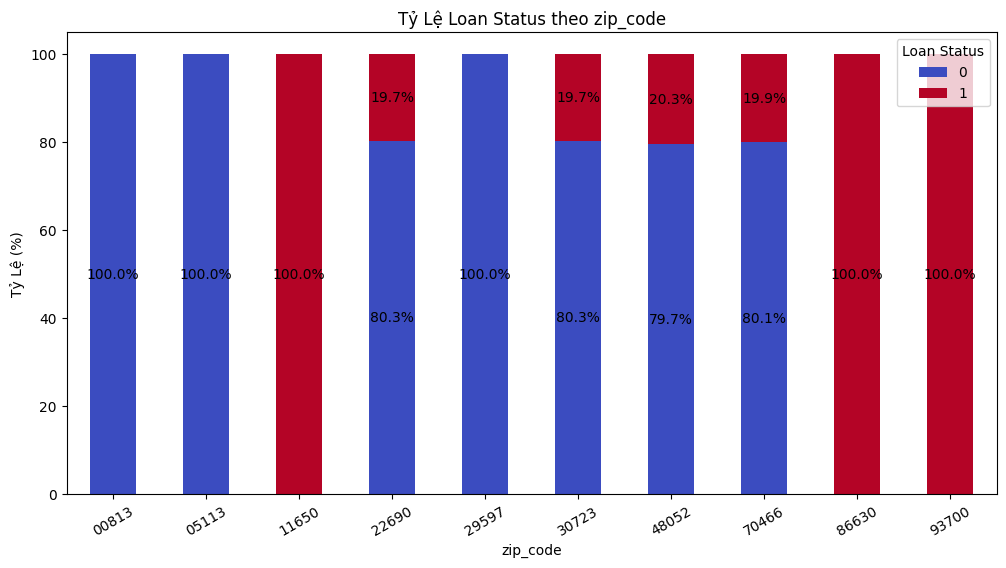

In [96]:
plot_loan_status_distribution(data, "zip_code", rotation=30)

In [97]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)

In [98]:
data.drop('address', axis=1, inplace=True)

In [99]:
data.shape

(321558, 28)

### home_ownership, verification_status, purpose









**home_ownership**: Trạng thái sở hữu nhà do người vay cung cấp khi đăng ký hoặc lấy từ báo cáo tín dụng. Các giá trị có thể là: RENT (thuê), OWN (sở hữu), MORTGAGE (thế chấp), OTHER (khác).

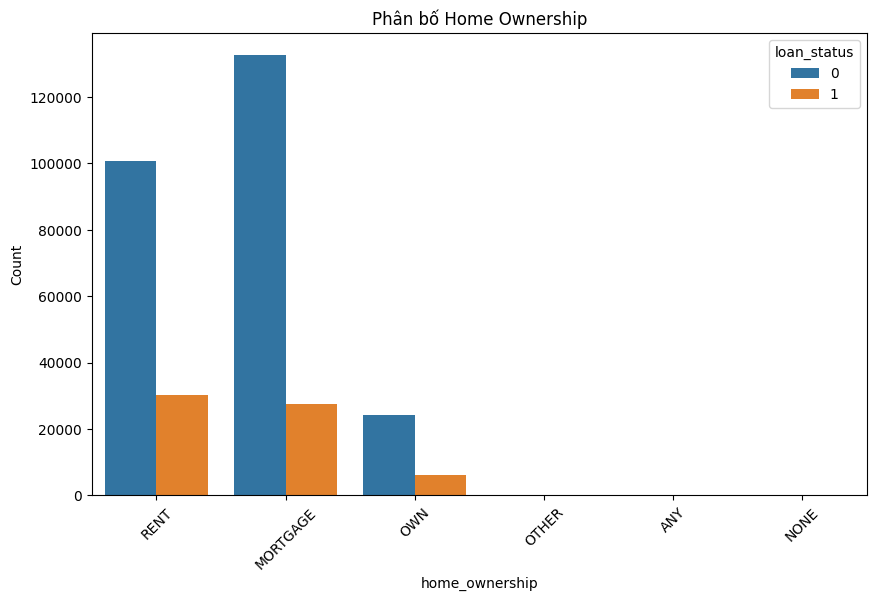

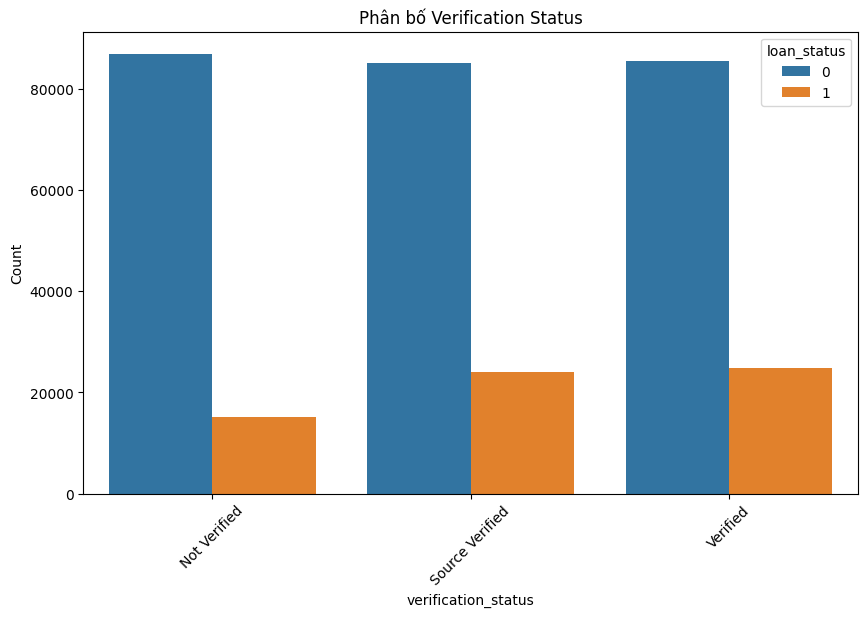

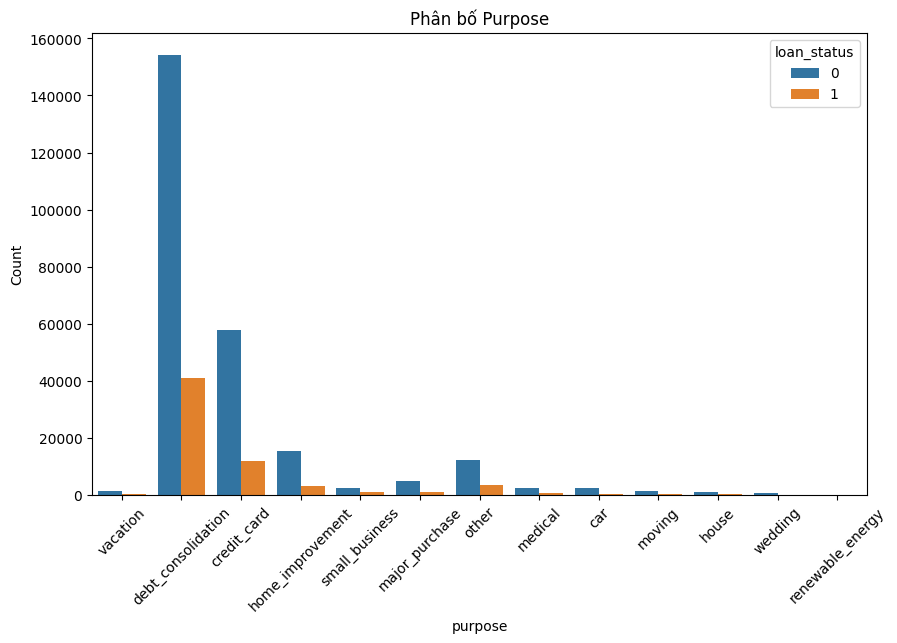

In [100]:
plot_countplot(data, "home_ownership", title="Phân bố Home Ownership")
plot_countplot(data, "verification_status", title="Phân bố Verification Status")
plot_countplot(data, "purpose", title="Phân bố Purpose")


In [101]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    159974
RENT        131099
OWN          30425
OTHER           32
NONE            26
ANY              2
Name: count, dtype: int64

In [102]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
data.home_ownership.value_counts()

home_ownership
MORTGAGE    159974
RENT        131099
OWN          30425
OTHER           60
Name: count, dtype: int64

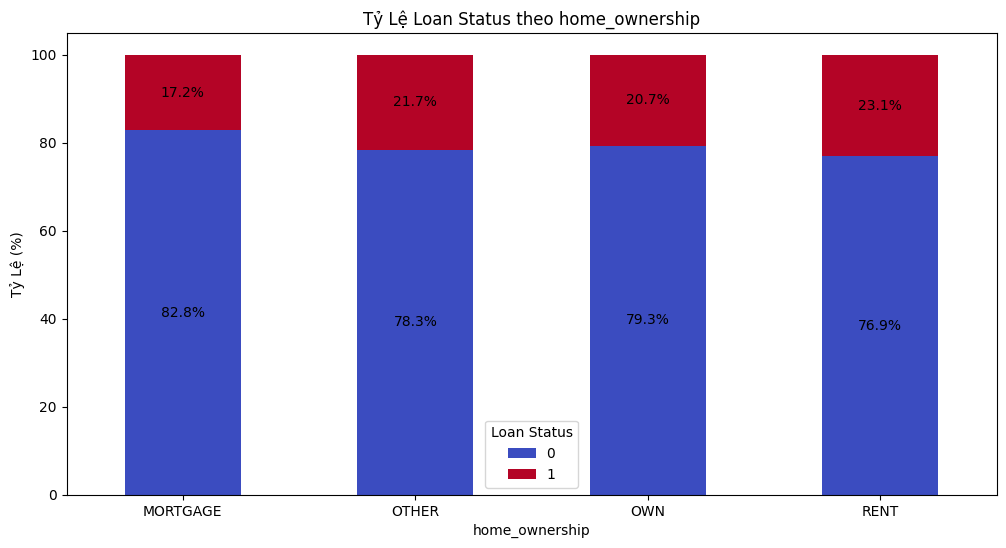

In [103]:
plot_loan_status_distribution(data, "home_ownership", rotation=0)

**vetification_status**: 	Cho biết thu nhập đã được LendingClub xác minh hay chưa, không xác minh, hoặc nguồn thu nhập đã được xác minh.

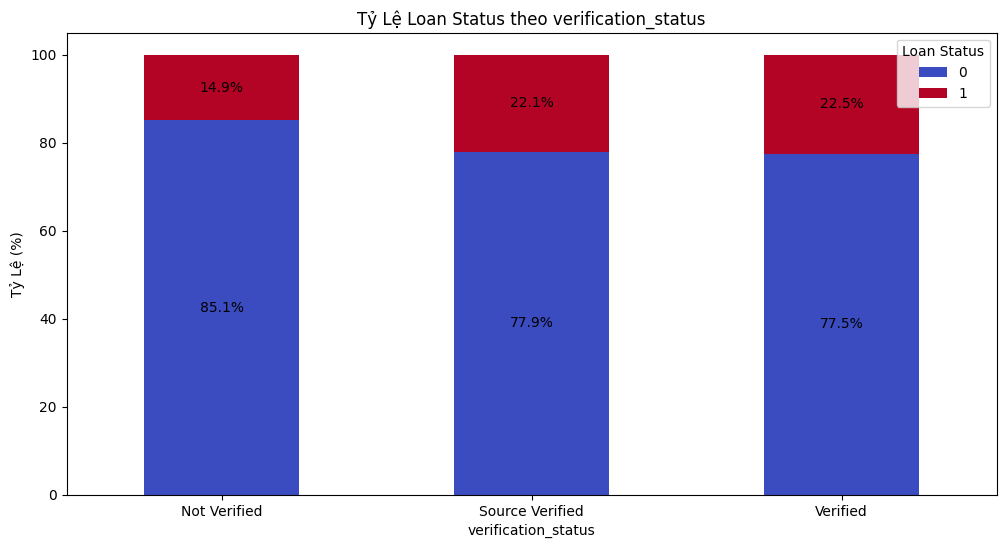

In [104]:
plot_loan_status_distribution(data, "verification_status", rotation=0)

In [105]:
data.drop('verification_status', axis=1, inplace=True)

**purpose**: Danh mục do người vay cung cấp cho yêu cầu vay.

In [106]:
# purpose_order = sorted(data["purpose"].dropna().unique())

# plt.figure(figsize=(12, 6))
# sns.countplot(data=data, x="purpose", hue="loan_status", order=purpose_order)
# plt.title("Phân bố purpose theo Loan_Status")
# plt.xlabel("Sub Grade")
# plt.ylabel("Số lượng")
# plt.xticks(rotation=30)
# plt.legend(title="Loan Status")
# plt.show()


### initial_list_status, application_type

**initial_list_status**: 	Trạng thái niêm yết ban đầu của khoản vay. Các giá trị có thể là W hoặc F.

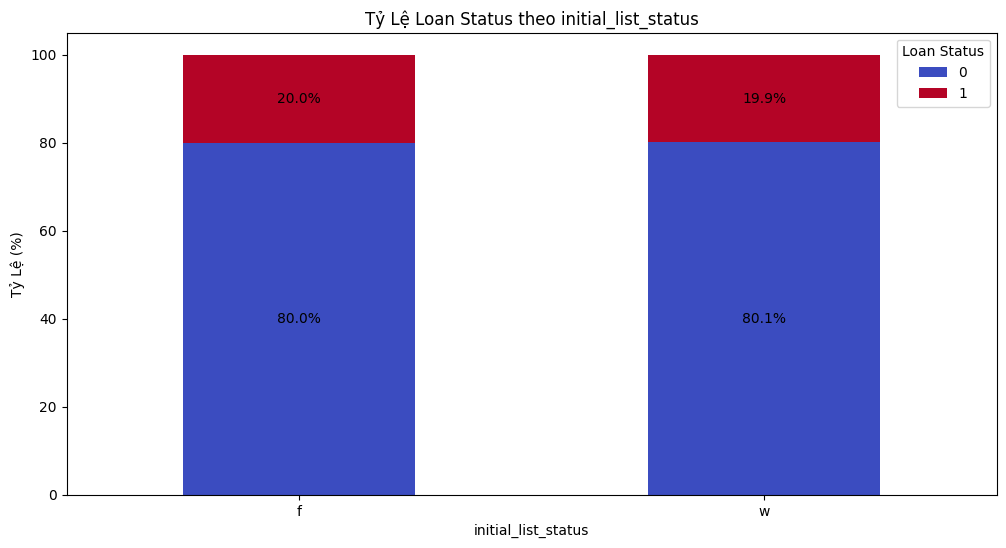

In [107]:
plot_loan_status_distribution(data, "initial_list_status", rotation=0)

In [108]:
data.drop('initial_list_status', axis=1, inplace=True)

**application_type**: Cho biết khoản vay là đơn vay cá nhân hay đơn vay chung với hai người đồng vay.

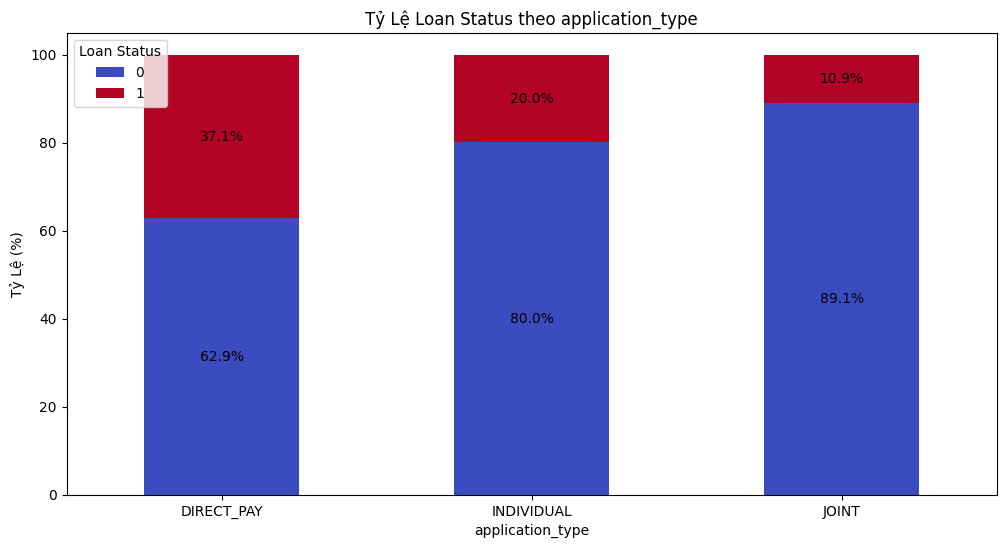

In [109]:
plot_loan_status_distribution(data, "application_type", rotation=0)

### emp_title, emp_length, title

In [110]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '15850' ==> '4.929%'
'emp_length': number of missing values '13075' ==> '4.066%'
'title': number of missing values '1494' ==> '0.465%'


<b>em_title</b>: Chức danh công việc do người vay cung cấp khi đăng ký vay.

In [111]:
data.emp_title.nunique()

139977

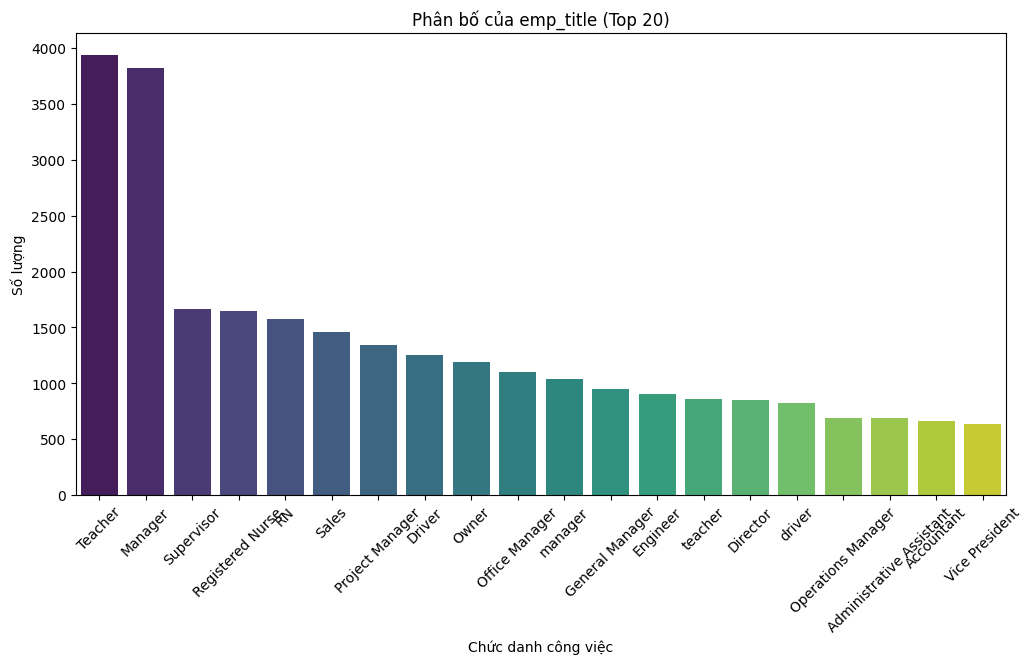

In [112]:
# Vẽ biểu đồ phân bố của emp_title
top_titles = data['emp_title'].value_counts().nlargest(20)  # Chỉ hiển thị 20 giá trị phổ biến nhất
plt.figure(figsize=(12, 6))
sns.barplot(x=top_titles.index, hue=top_titles.index, legend=False, y=top_titles.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Chức danh công việc")
plt.ylabel("Số lượng")
plt.title("Phân bố của emp_title (Top 20)")
plt.show()

Là dữ liệu văn bản tự do (free-text), cần mã hóa phức tạp (ví dụ: one-hot encoding), nhưng số lượng giá trị độc nhất lớn dẫn đến quá nhiều chiều dữ liệu, dễ gây nhiễu. -> bỏ

In [113]:
data = data.drop('emp_title', axis=1)

<b>emp_length</b>: Số năm làm việc. Giá trị từ 0 đến 10, trong đó 0 nghĩa là ít hơn một năm và 10 nghĩa là mười năm hoặc hơn.

In [114]:
def convert_emp_length(emp):
    if emp == '10+ years':
        return 10
    elif emp == '< 1 year':
        return 0
    elif isinstance(emp, str):  # Nếu là chuỗi dạng 'X years'
        return int(emp.split()[0])
    else:
        return np.nan  # Nếu giá trị không hợp lệ, trả về NaN

data['emp_length'] = data['emp_length'].apply(convert_emp_length)

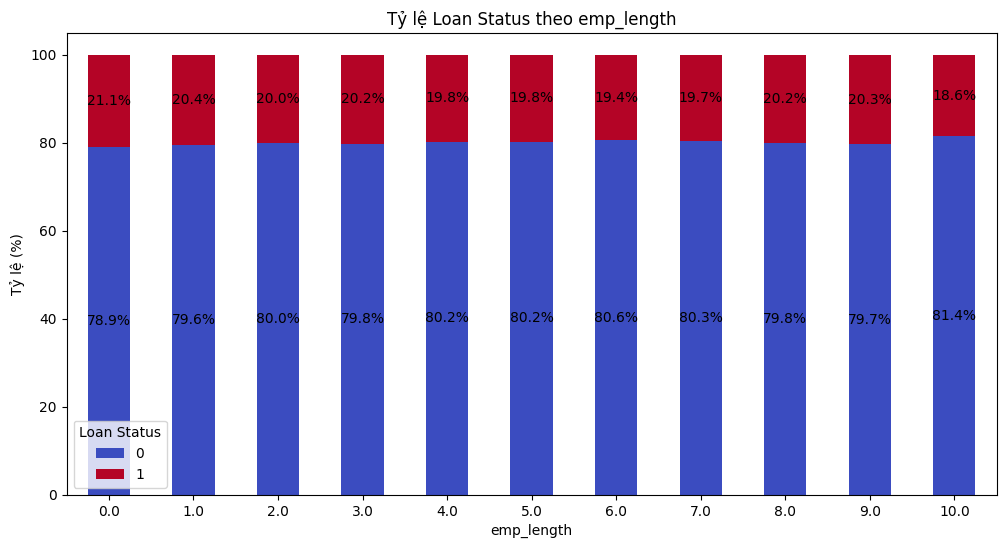

In [115]:
# Sắp xếp thứ tự emp_length
emp_length_order = sorted(data["emp_length"].dropna().unique())

# Đếm số lượng mỗi loan_status trong từng emp_length
emp_length_counts = data.groupby(["emp_length", "loan_status"]).size().unstack()

# Chuẩn hóa thành phần trăm
emp_length_pct = emp_length_counts.div(emp_length_counts.sum(axis=1), axis=0) * 100

# Vẽ stacked bar chart theo tỷ lệ %
ax = emp_length_pct.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")

plt.title("Tỷ lệ Loan Status theo emp_length")
plt.xlabel("emp_length")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=0)
plt.legend(title="Loan Status")

# Thêm nhãn phần trăm trên mỗi cột
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 3:  # Chỉ hiển thị nếu giá trị đủ lớn
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                    f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

plt.show()


In [116]:
data.drop('emp_length', axis=1, inplace=True)

In [117]:
data.shape

(321558, 24)

<b>title</b>: Tiêu đề khoản vay do người vay cung cấp.

In [118]:
data.title.value_counts()

title
Debt consolidation         135784
Credit card refinancing     45883
Home improvement            13128
Other                       11415
Debt Consolidation           8554
                            ...  
Paydown Credit Cards            1
moving on up                    1
sweet                           1
Mortgage Convertion             1
Loanforpayoff                   1
Name: count, Length: 31748, dtype: int64

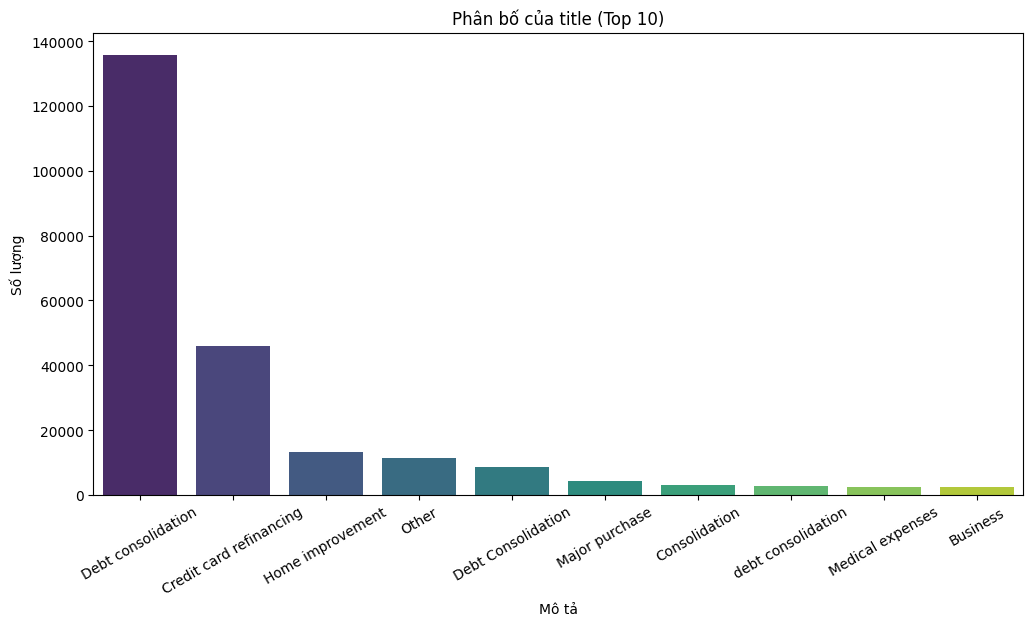

In [119]:
# Vẽ biểu đồ phân bố của title
top_titles = data['title'].value_counts().nlargest(10)  # Chỉ hiển thị 20 giá trị phổ biến nhất
plt.figure(figsize=(12, 6))
sns.barplot(x=top_titles.index, hue=top_titles.index, legend=False, y=top_titles.values, palette="viridis")
plt.xticks(rotation=30)
plt.xlabel("Mô tả")
plt.ylabel("Số lượng")
plt.title("Phân bố của title (Top 10)")
plt.show()

Thường trùng lặp với purpose, nhưng có 1,756 giá trị thiếu và là dữ liệu văn bản tự do, khó xử lý. -> bỏ

In [120]:
data = data.drop('title', axis=1)

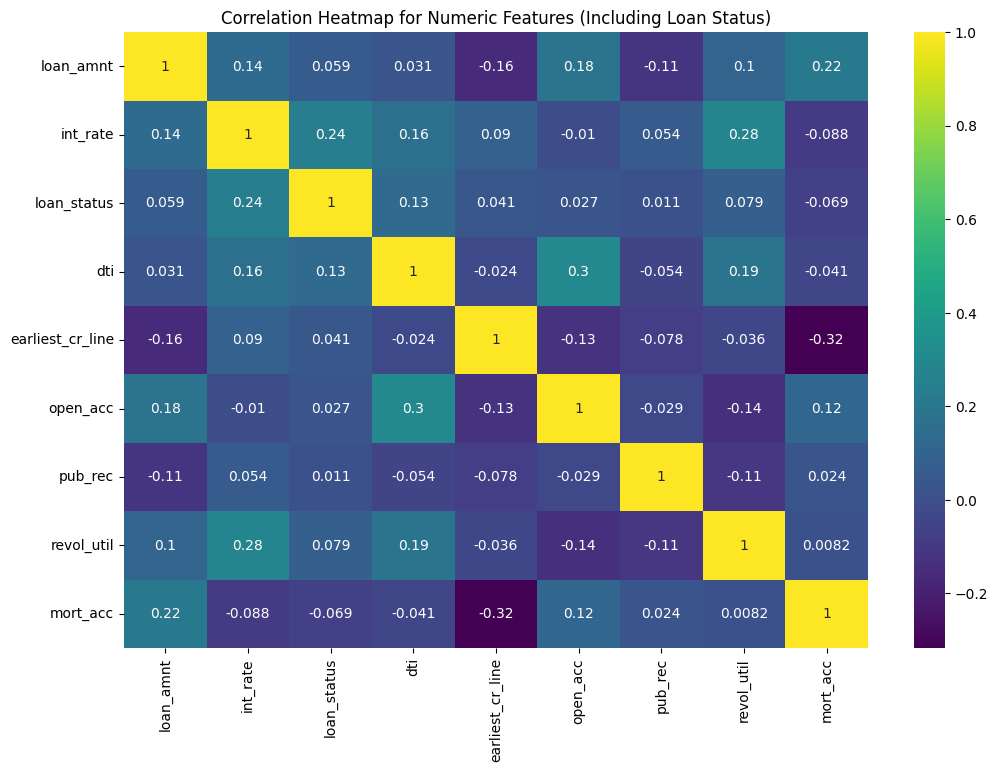

In [121]:
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap for Numeric Features (Including Loan Status)")
plt.show()

In [122]:
data.shape

(321558, 23)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321558 entries, 0 to 396028
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amnt         321558 non-null  float64
 1   term              321558 non-null  object 
 2   int_rate          321558 non-null  float64
 3   sub_grade         321558 non-null  object 
 4   home_ownership    321558 non-null  object 
 5   loan_status       321558 non-null  int64  
 6   purpose           321558 non-null  object 
 7   dti               321558 non-null  float64
 8   earliest_cr_line  321558 non-null  float64
 9   open_acc          321558 non-null  float64
 10  pub_rec           321558 non-null  int64  
 11  revol_util        321558 non-null  float64
 12  application_type  321558 non-null  object 
 13  mort_acc          321558 non-null  float64
 14  zip_code_05113    321558 non-null  bool   
 15  zip_code_11650    321558 non-null  bool   
 16  zip_code_22690    321558 

## Dummy

In [124]:
dummies = ['term', 'sub_grade', 'purpose',
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

## Train-Test Split

In [125]:
data.head(10)

# data.hist(figsize=(10, 8), bins=10)
# plt.show()

,loan_amnt,int_rate,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_util,mort_acc,zip_code_05113,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,11.44,0,26.24,1990.0,16.0,0,41.8,0.0,False,...,False,False,False,True,False,True,False,False,False,True
1,8000.0,11.99,0,22.05,2004.0,17.0,0,53.3,3.0,True,...,False,False,False,False,False,True,False,False,False,False
2,15600.0,10.49,0,12.79,2007.0,13.0,0,92.2,0.0,True,...,False,False,False,False,False,True,False,False,False,True
3,7200.0,6.49,0,2.60,2006.0,6.0,0,21.5,0.0,False,...,False,False,False,False,False,True,False,False,False,True
4,24375.0,17.27,1,33.95,1999.0,13.0,0,69.8,1.0,False,...,False,False,False,False,False,True,False,False,False,False
5,20000.0,13.33,0,16.31,2005.0,8.0,0,100.6,4.0,False,...,False,False,False,False,False,True,False,False,False,False
6,18000.0,5.32,0,1.36,2005.0,8.0,0,4.9,3.0,False,...,False,False,False,False,False,True,False,False,False,False
7,13000.0,11.14,0,26.87,1994.0,11.0,0,64.5,0.0,False,...,False,False,False,False,False,True,False,False,False,True
8,18900.0,10.99,0,12.52,1994.0,13.0,0,32.9,3.0,False,...,False,False,False,False,False,True,False,False,False,True
9,26300.0,16.29,0,23.69,1997.0,13.0,0,82.4,1.0,False,...,False,False,False,False,False,True,False,False,False,False


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321558 entries, 0 to 396028
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    321558 non-null  float64
 1   int_rate                     321558 non-null  float64
 2   loan_status                  321558 non-null  int64  
 3   dti                          321558 non-null  float64
 4   earliest_cr_line             321558 non-null  float64
 5   open_acc                     321558 non-null  float64
 6   pub_rec                      321558 non-null  int64  
 7   revol_util                   321558 non-null  float64
 8   mort_acc                     321558 non-null  float64
 9   zip_code_05113               321558 non-null  bool   
 10  zip_code_11650               321558 non-null  bool   
 11  zip_code_22690               321558 non-null  bool   
 12  zip_code_29597               321558 non-null  bool   
 13  zip_

In [127]:
train, test = train_test_split(data, test_size=0.3, random_state=42)
test, backtest = train_test_split(test, test_size=0.5, random_state=42)

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Backtest shape:", backtest.shape)


X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status
X_backtest, y_backtest = backtest.drop('loan_status', axis=1), backtest.loan_status


Train shape: (225090, 70)
Test shape: (48234, 70)
Backtest shape: (48234, 70)


In [128]:
print("Phân phối:", y_train.value_counts())

Phân phối: loan_status
0    180054
1     45036
Name: count, dtype: int64


## UpSampling with SMOTE & Normalization using Min-Max Scaler

In [129]:
# smote = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


# # Kiểm tra phân phối sau khi cân bằng
# print("\nPhân phối loan_status trong tập train sau khi cân bằng:")
# print(y_train_balanced.value_counts())

In [ ]:
scaler = MinMaxScaler()
joblib.dump(scaler, 'scaler.pkl')
# # Chuẩn hóa dữ liệu cho tập huấn luyện
# X_train_scaled = scaler.fit_transform(X_train_balanced)

# Chuẩn hóa dữ liệu cho tập huấn luyện
X_train_scaled = scaler.fit_transform(X_train)

# Chuẩn hóa dữ liệu cho tập xác thực
X_test_scaled = scaler.transform(X_test)

X_backtest_scaled = scaler.transform(X_backtest)



# **Model Building**

In [131]:
def evaluate_model(model, X_test_scaled, y_test):
    """
    Hàm đánh giá mô hình: in accuracy, classification report và vẽ confusion matrix.
    
    Parameters:
    - model: Mô hình đã huấn luyện (e.g., LogisticRegression, RandomForestClassifier)
    - X_test_scaled: Dữ liệu test đã được chuẩn hóa (hoặc không, tùy mô hình)
    - y_test: Nhãn thực tế của tập test
    """
    # Dự đoán trên tập test
    y_test_pred = model.predict(X_test_scaled)
    
    # Tính độ chính xác
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"\nAccuracy trên tập test: {test_accuracy:.4f}")
    
    # In báo cáo phân loại
    print("\nClassification Report trên tập test:")
    print(classification_report(y_test, y_test_pred))
    
    # Tính ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Vẽ ma trận nhầm lẫn bằng seaborn
    plt.figure(figsize=(6, 4))  # Đặt kích thước hình
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative (0)', 'Positive (1)'], 
                yticklabels=['Negative (0)', 'Positive (1)'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Balanced Weights)')
    plt.show()

## KNN

🔍 K tối ưu: 7


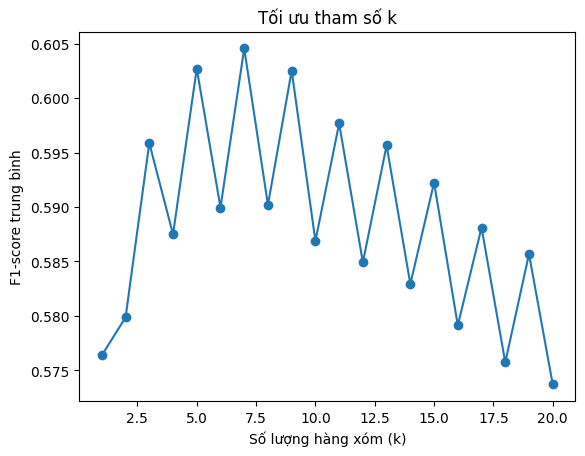

In [ ]:
# Bắt đầu đo thời gian
start_time = time.time()

k_range = list(range(1, 21))  # Thử từ k=1 đến k=20
cv_scores = []  # Lưu điểm đánh giá

# Duyệt qua từng giá trị của k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='f1')  # Đánh giá bằng F1-score
    cv_scores.append(scores.mean())

# Tìm k tốt nhất
best_k = k_range[np.argmax(cv_scores)]
print(f"🔍 K tối ưu: {best_k}")

# Huấn luyện với k tốt nhất
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

joblib.dump(knn_best, 'knn_best.pkl')

# Kết thúc đo thời gian
end_time = time.time()

# Vẽ biểu đồ
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Số lượng hàng xóm (k)')
plt.ylabel('F1-score trung bình')
plt.title('Tối ưu tham số k')
plt.show()


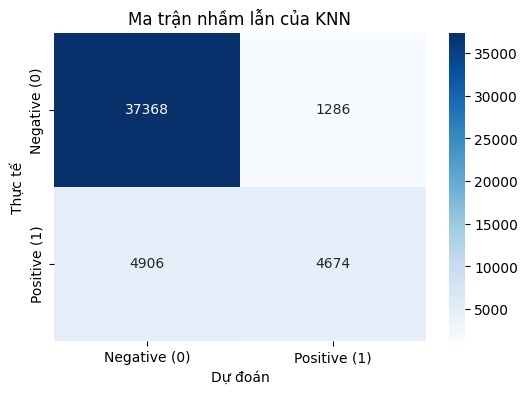


🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     38654
           1       0.78      0.49      0.60      9580

    accuracy                           0.87     48234
   macro avg       0.83      0.73      0.76     48234
weighted avg       0.86      0.87      0.86     48234



In [ ]:
# Dự đoán trên tập test
y_test_pred = knn_best.predict(X_test_scaled)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_test_pred)

# Vẽ heatmap ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative (0)', 'Positive (1)'], yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn của KNN')
plt.show()

# In classification report
print("\n🔍 Classification Report:\n", classification_report(y_test, y_test_pred))



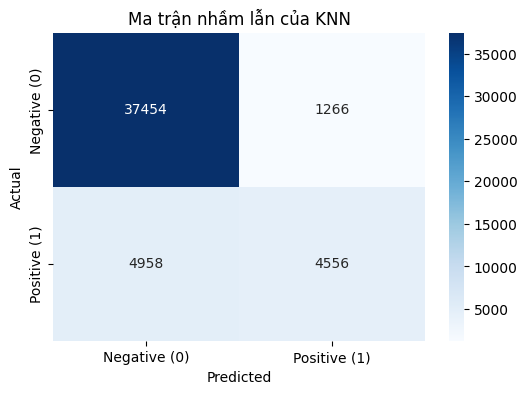


🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     38720
           1       0.78      0.48      0.59      9514

    accuracy                           0.87     48234
   macro avg       0.83      0.72      0.76     48234
weighted avg       0.86      0.87      0.86     48234



In [ ]:
# Dự đoán trên tập backtest
y_backtest_pred_knn = knn_best.predict(X_backtest_scaled)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_backtest, y_backtest_pred_knn)

# Vẽ heatmap ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative (0)', 'Positive (1)'], yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ma trận nhầm lẫn của KNN')
plt.show()

# In classification report
print("\n🔍 Classification Report:\n", classification_report(y_backtest, y_backtest_pred_knn))



### Logistic Regression

In [ ]:
# Bắt đầu đo thời gian
start_time = time.time()

# Khởi tạo Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced")
logistic_model.fit(X_train_scaled, y_train)

# Kết thúc đo thời gian
end_time = time.time()

# Tính tổng thời gian huấn luyện
training_time = end_time - start_time
print(f"Thời gian huấn luyện mô hình: {training_time:.2f} giây")

joblib.dump(logistic_model, 'logistic_model.pkl')

print("Mô hình và scaler đã được lưu thành công!")


Thời gian huấn luyện mô hình: 5.79 giây
Mô hình và scaler đã được lưu thành công!



Accuracy trên tập test: 0.7987

Classification Report trên tập test:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86     38654
           1       0.50      0.81      0.62      9580

    accuracy                           0.80     48234
   macro avg       0.72      0.80      0.74     48234
weighted avg       0.86      0.80      0.81     48234



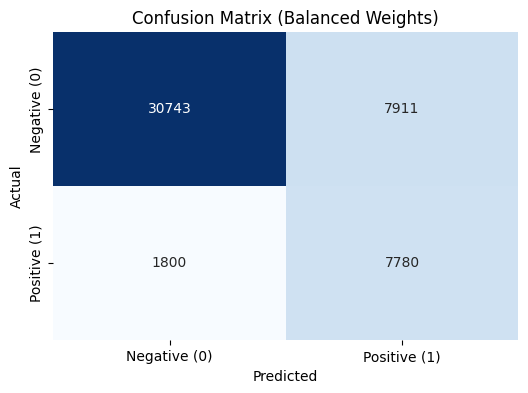

In [133]:
evaluate_model(logistic_model, X_test_scaled, y_test)


Accuracy trên tập test: 0.7968

Classification Report trên tập test:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86     38720
           1       0.49      0.81      0.61      9514

    accuracy                           0.80     48234
   macro avg       0.72      0.80      0.74     48234
weighted avg       0.85      0.80      0.81     48234



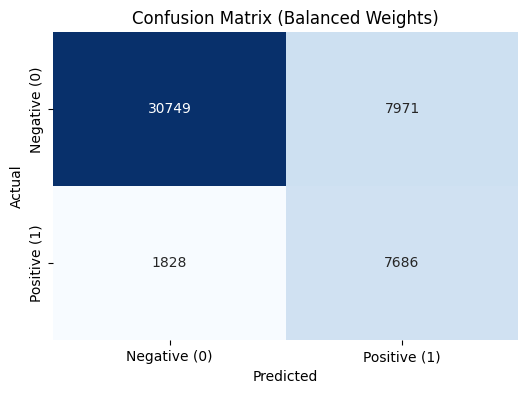

In [134]:
evaluate_model(logistic_model, X_backtest_scaled, y_backtest)

## Random Forest Classifier

In [ ]:
# Bắt đầu đo thời gian
start_time = time.time()

# Khởi tạo và huấn luyện mô hình
rf_model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42, class_weight="balanced") 
rf_model.fit(X_train_scaled, y_train)

# Kết thúc đo thời gian
end_time = time.time()

# Tính tổng thời gian huấn luyện
training_time = end_time - start_time
print(f"Thời gian huấn luyện mô hình: {training_time:.2f} giây")

# Lưu mô hình
joblib.dump(rf_model, "rf_model.pkl")
print("Mô hình Random Forest đã được lưu thành công!")


Thời gian huấn luyện mô hình: 118.38 giây
Mô hình Random Forest đã được lưu thành công!



Accuracy trên tập test: 0.7963

Classification Report trên tập test:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86     38654
           1       0.49      0.75      0.59      9580

    accuracy                           0.80     48234
   macro avg       0.71      0.78      0.73     48234
weighted avg       0.84      0.80      0.81     48234



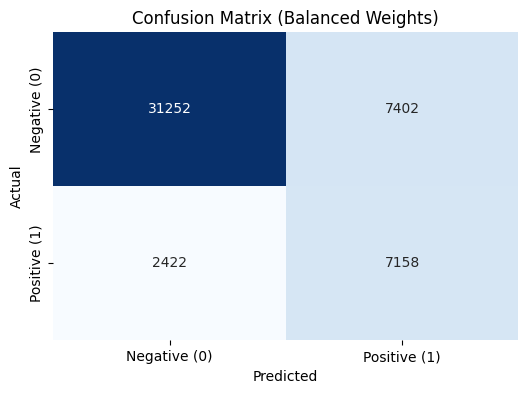

In [136]:
evaluate_model(rf_model, X_test_scaled, y_test)


Accuracy trên tập test: 0.7960

Classification Report trên tập test:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86     38720
           1       0.49      0.75      0.59      9514

    accuracy                           0.80     48234
   macro avg       0.71      0.78      0.73     48234
weighted avg       0.84      0.80      0.81     48234



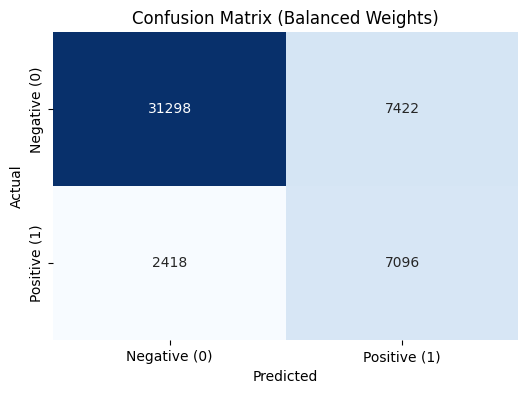

In [137]:
evaluate_model(rf_model, X_backtest_scaled, y_backtest)

# Evaluate

In [154]:
def evaluate_model(model, X_test_scaled, y_test, model_name="Model"):
    """
    Đánh giá mô hình và trả về classification report dưới dạng chuỗi.
    
    Parameters:
    - model: Mô hình đã huấn luyện
    - X_test_scaled: Dữ liệu test
    - y_test: Nhãn thực tế
    - model_name: Tên mô hình (mặc định là "Model")
    """
    y_test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # print(f"\nAccuracy trên tập test ({model_name}): {test_accuracy:.4f}")
    # print(f"\nClassification Report trên tập test ({model_name}):")
    report = classification_report(y_test, y_test_pred)
    # print(report)
    
    return report

# Hàm trích xuất số liệu từ classification_report
def extract_metrics(report):
    lines = report.split("\n")
    metrics = []
    values = []

    for line in lines[2:-3]:  # Bỏ qua dòng đầu và cuối không chứa số liệu
        parts = line.split()
        if len(parts) >= 4:
            metrics.append(f"{parts[0]}_Precision")
            metrics.append(f"{parts[0]}_Recall")
            metrics.append(f"{parts[0]}_F1-score")
            values.extend([float(parts[1]), float(parts[2]), float(parts[3])])

    # Thêm Accuracy
    accuracy = float(lines[-2].split()[-2])
    metrics.append("Accuracy")
    values.append(accuracy)

    return metrics, values

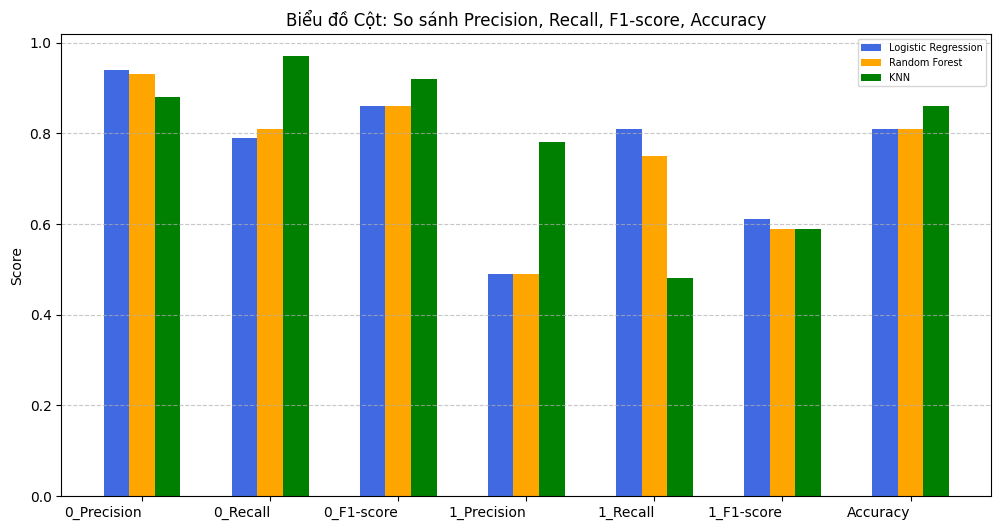

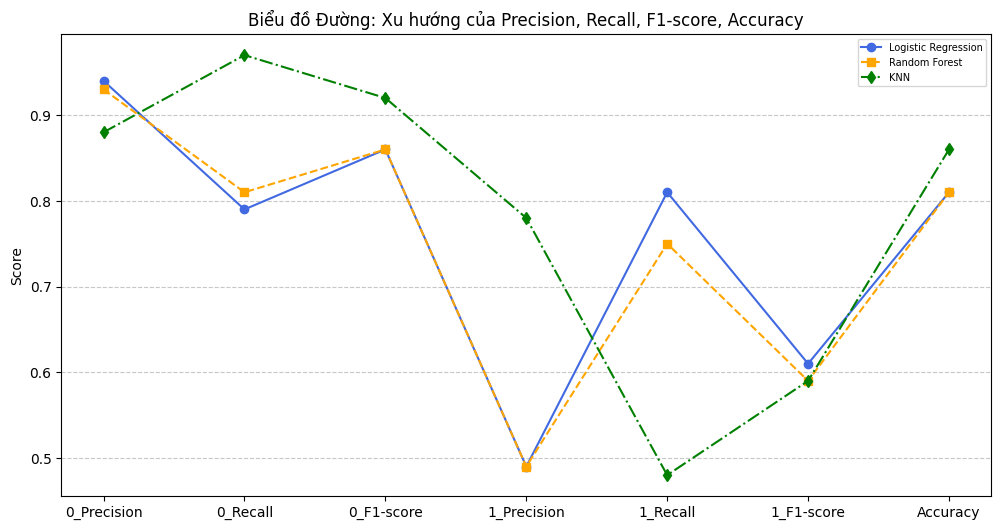

In [156]:
def compare_models(model1, model2, model3, X_test_scaled, y_test, model1_name="Logistic Regression", model2_name="Random Forest", model3_name="KNN"):
    """
    So sánh ba mô hình: đánh giá và vẽ hai biểu đồ riêng biệt (cột + đường).
    
    Parameters:
    - model1, model2, model3: Ba mô hình đã huấn luyện
    - X_test_scaled: Dữ liệu test
    - y_test: Nhãn thực tế
    - model1_name, model2_name, model3_name: Tên của ba mô hình
    """
    # Đánh giá từng mô hình và lấy report
    report1 = evaluate_model(model1, X_test_scaled, y_test, model1_name)
    report2 = evaluate_model(model2, X_test_scaled, y_test, model2_name)
    report3 = evaluate_model(model3, X_test_scaled, y_test, model3_name)
    
    # Trích xuất số liệu
    metrics, values_model1 = extract_metrics(report1)
    _, values_model2 = extract_metrics(report2)
    _, values_model3 = extract_metrics(report3)
    
    # Tạo DataFrame
    df = pd.DataFrame({
        "Metric": metrics,
        model1_name: values_model1,
        model2_name: values_model2,
        model3_name: values_model3
    }).set_index("Metric")

    x = np.arange(len(metrics))  # Vị trí các chỉ số
    bar_width = 0.2  # Độ rộng của cột

    # --- Biểu đồ Cột ---
    plt.figure(figsize=(12, 6))
    plt.bar(x - bar_width, values_model1, bar_width, label=model1_name, color='royalblue')
    plt.bar(x, values_model2, bar_width, label=model2_name, color='orange')
    plt.bar(x + bar_width, values_model3, bar_width, label=model3_name, color='green')
    plt.xticks(x, metrics, rotation=0, ha='right')
    plt.ylabel("Score")
    plt.title("Biểu đồ Cột: So sánh Precision, Recall, F1-score, Accuracy")
    plt.legend(loc='upper right', prop={'size': 7})
    plt.grid(axis='y', linestyle="--", alpha=0.7)
    plt.show()

    # --- Biểu đồ Đường ---
    plt.figure(figsize=(12, 6))
    plt.plot(metrics, values_model1, marker='o', linestyle='-', color='royalblue', label=model1_name)
    plt.plot(metrics, values_model2, marker='s', linestyle='--', color='orange', label=model2_name)
    plt.plot(metrics, values_model3, marker='d', linestyle='-.', color='green', label=model3_name)
    plt.xticks(rotation=0)
    plt.ylabel("Score")
    plt.title("Biểu đồ Đường: Xu hướng của Precision, Recall, F1-score, Accuracy")
    plt.legend(loc='upper right', prop={'size': 7})
    plt.grid(axis='y', linestyle="--", alpha=0.7)
    plt.show()

# Gọi hàm so sánh 3 mô hình
compare_models(logistic_model, rf_model, knn_best, X_backtest_scaled, y_backtest, "Logistic Regression", "Random Forest", "KNN")


# User Interface

In [139]:
# # Cài đặt các thư viện cần thiết
# !pip install streamlit
# !pip install pyngrok

# # Tải ngrok
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -q
# !unzip ngrok-stable-linux-amd64.zip

In [140]:
# %%writefile app.py
# import streamlit as st
# import pandas as pd
# import numpy as np
# import joblib

# st.set_page_config(page_title="Dự đoán khả năng trả nợ", page_icon="💰")

# st.markdown(
#     """
#     <style>
#         .stApp {
#             background-color: #87CEEB !important; /* Màu nền xanh dương */
#         }
#         .header {
#             color: #8F87F1;
#             text-align: center;
#             font-size: 50px !important;
#             font-weight: bold;
#         }
#         .custom-subheader {
#             margin: 10px;
#             background-color: #FFDCCC;
#             color: #FF8989;
#             padding: 12px;
#             border-radius: 10px;
#             text-align: center;
#             font-size: 24px;
#             font-weight: bold;

#         }
#         div.stButton > button {
#             background-color: #4CAF50 !important;
#             color: white !important;
#             border-radius: 8px !important;
#             font-size: 18px !important;
#             font-weight: bold;
#             padding: 10px 20px !important;
#             transition: 0.3s;
#         }
#         div.stButton > button:hover {
#             background-color: #45a049 !important;
#         }
#     </style>
#     """,
#     unsafe_allow_html=True
# )

# # st.markdown("""<h1 class='header'>DỰ ĐOÁN KHẢ NĂNG TRẢ NỢ</h1>""", unsafe_allow_html=True)

# st.markdown("""<div class='custom-subheader'>Nhập thông tin</div>""", unsafe_allow_html=True)

# model = joblib.load("best_model.pkl")
# scaler = joblib.load("scaler.pkl")

# with st.form(key='loan_form'):
#     loan_amnt = st.number_input("Số tiền vay (USD)", min_value=0.0, max_value=100000.0, value=1000.0)
#     int_rate = st.number_input("Lãi suất (%)", min_value=0.0, max_value=100.0, value=1.0)
#     open_acc = st.number_input("Số tài khoản tín dụng đang mở", min_value=0, max_value=100, value=1)
#     dti = st.number_input("Tỷ lệ nợ trên thu nhập (DTI)", min_value=0.0, max_value=100.0, value=1.0)
#     pub_rec = st.number_input("Số lượng hồ sơ công khai", min_value=0, max_value=100, value=1)
#     earliest_cr_line = st.number_input("Năm mở tài khoản tín dụng đầu tiên", min_value=1900, max_value=2025, value=2005)
#     revol_util = st.number_input("Tỷ lệ sử dụng tín dụng quay vòng (%)", min_value=0.0, max_value=100.0, value=5.0)
#     mort_acc = st.number_input("Số tài khoản thế chấp", min_value=0, max_value=50, value=1)

#     term = st.selectbox("Thời hạn vay", ["36 months", "60 months"])
#     sub_grade = st.selectbox("Cấp tín dụng phụ", ['A1', 'A2', 'A3', 'A4', 'A5',
#                                                  'B1', 'B2', 'B3', 'B4', 'B5',
#                                                  'C1', 'C2', 'C3', 'C4', 'C5',
#                                                  'D1', 'D2', 'D3', 'D4', 'D5',
#                                                  'E1', 'E2', 'E3', 'E4', 'E5',
#                                                  'F1', 'F2', 'F3', 'F4', 'F5',
#                                                  'G1', 'G2', 'G3', 'G4', 'G5'])
#     zip_code = st.selectbox("Zip code",["70466", "22690", "30723", "48052", "00831", "29597", "05113", "11650", "93700", "86630"])
#     home_ownership = st.selectbox("Loại hình sở hữu nhà", ["RENT", "MORTGAGE", "OTHER", "OWN"])
#     purpose = st.selectbox("Mục đích vay", ["vacation", "debt_consolidation","credit_card", "home_improvement", "small_business",
#                                            "medical", "other", "wedding", "car", "moving", "house", "major_purchase", "educational",
#                                            "renewable_energy"])
#     application_type = st.selectbox("Loại đơn vay", ["Individual", "Joint", "DIRECT_PAY"])

#     submit_button = st.form_submit_button(label="Dự đoán")

# if submit_button:
#     input_data = pd.DataFrame({
#         'loan_amnt': [loan_amnt],
#         'int_rate': [int_rate],
#         'open_acc': [open_acc],
#         'dti': [dti],
#         'pub_rec': [pub_rec],
#         'revol_util': [revol_util],
#         'earliest_cr_line': [earliest_cr_line],
#         'mort_acc': [mort_acc],
#         'term': [term],
#         'sub_grade': [sub_grade],
#         'zip_code': [zip_code],
#         'home_ownership': [home_ownership],
#         'purpose': [purpose],
#         'application_type': [application_type],
#     })

#     dummies = ['term', 'sub_grade', 'zip_code', 'home_ownership', 'purpose', 'application_type']
#     input_data = pd.get_dummies(input_data, columns=dummies)

#     missing_cols = set(scaler.feature_names_in_) - set(input_data.columns)
#     for col in missing_cols:
#         input_data[col] = 0

#     input_data = input_data[scaler.feature_names_in_]
#     input_data_scaled = scaler.transform(input_data)

#     prediction = model.predict(input_data_scaled)[0]
#     probability_fully_paid = model.predict_proba(input_data_scaled)[0][0]

#     result = "✅ **Fully Paid (Hoàn trả đầy đủ)**" if prediction == 0 else "❌ **Charged Off (Vỡ nợ)**"
#     st.write(f"Kết quả dự đoán: {result}")
#     st.write(f"Xác suất hoàn trả đầy đủ: {probability_fully_paid:.2%}")


In [141]:
# !ngrok authtoken 2uf8VUhl30bkiW7HK1hazMgFQ7vn_5ASiXEgQ9HDyyyBneU2PP

In [142]:
# # Tạo đường hầm truy cập Streamlit
# from pyngrok import ngrok

# # Chạy Streamlit trong nền
# get_ipython().system_raw("streamlit run app.py &")

# # Kết nối ngrok với cổng 8501
# public_url = ngrok.connect(8501)
# print(f"Truy cập giao diện tại: {public_url}")


In [143]:
# # Xoá các tiến trình đang chạy nếu có

# !kill $(pgrep ngrok)